In [1]:
import pandas as pd
import os 
import altair as alt
import numpy as np
from scipy import stats
from sklearn import linear_model 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
#os.chdir("C:\\Users\\awyat049\\OneDrive\\Documents\\Coding\\2022_12_05_Final_Data_ComboScore")
os.chdir("C:\\Users\\awyat049\\OneDrive\\Documents\\Coding\\report")

In [180]:
rising_price_home = pd.read_csv('rising_price_home_sentiment.csv')
rising_price_housing = pd.read_csv('rising_price_housing_sentiment.csv')
rising_prices_home = pd.read_csv('rising_prices_home_sentiment.csv')
rising_prices_housing = pd.read_csv('rising_prices_housing_sentiment.csv')

rising_prices = pd.read_csv('rising_prices_sentiment.csv')

increase_price_home = pd.read_csv('increase_price_home_sentiment.csv')
increase_prices_home = pd.read_csv('increase_prices_home_sentiment.csv')
increase_price_housing = pd.read_csv('increase_price_housing_sentiment.csv')
increase_prices_housing = pd.read_csv('increase_prices_housing_sentiment.csv')

increase_prices = pd.read_csv('Increase_of_prices_sentiment.csv')

In [181]:
rising_price_home_g = rising_price_home.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rising_price_housing_g = rising_price_housing.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rising_prices_g = rising_prices.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rising_prices_home_g = rising_prices_home.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rising_prices_housing_g = rising_prices_housing.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_price_home_g = increase_price_home.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_prices_home_g = increase_prices_home.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_price_housing_g = increase_price_housing.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_prices_housing_g = increase_prices_housing.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_prices_g = increase_prices.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

In [182]:
df_mean_compound_score_rising = pd.concat([rising_price_home_g, rising_price_housing_g, rising_prices_g, rising_prices_home_g, rising_prices_housing_g ], ignore_index = False)
df_mean_compound_score_rising

,period,compound_score,topic
0,2016-10,0.418025,rising_price_home
1,2016-11,0.225603,rising_price_home
2,2016-12,0.246179,rising_price_home
3,2017-01,0.418746,rising_price_home
4,2017-02,0.091988,rising_price_home
...,...,...,...
68,2022-06,0.003909,rising_prices_housing
69,2022-07,0.118810,rising_prices_housing
70,2022-08,0.016944,rising_prices_housing
71,2022-09,0.147858,rising_prices_housing


In [183]:
df_mean_compound_score_increase = pd.concat([increase_price_home_g, increase_prices_home_g, increase_price_housing_g,increase_prices_housing_g,increase_prices_g ], ignore_index = False)
df_mean_compound_score_increase

,period,compound_score,topic
0,2016-10,0.431460,increase_price_home
1,2016-11,0.354115,increase_price_home
2,2016-12,0.427960,increase_price_home
3,2017-01,0.328991,increase_price_home
4,2017-02,0.371436,increase_price_home
...,...,...,...
68,2022-06,0.234069,Increase_of_prices
69,2022-07,0.259045,Increase_of_prices
70,2022-08,0.277550,Increase_of_prices
71,2022-09,0.280171,Increase_of_prices


In [184]:
alt.Chart(df_mean_compound_score_rising, title='Average global score sentiment over the months (2016-2022)').mark_line().encode(
    x = alt.X('period:O', axis=alt.Axis(title='Time')),
    y = alt.Y('compound_score', axis=alt.Axis(title='Average compound sentiment score'), scale=alt.Scale(domain=[-0.2,1])),
    color=alt.Color('topic:N', scale=alt.Scale(scheme='category10'))
).properties(width=800)

alt.Chart(...)

In [185]:
alt.Chart(df_mean_compound_score_increase, title='Average global score sentiment over the months (2016-2022)').mark_line().encode(
    x = alt.X('period:O', axis=alt.Axis(title='Time')),
    y = alt.Y('compound_score', axis=alt.Axis(title='Average compound sentiment score'), scale=alt.Scale(domain=[-0.2,1])),
    color=alt.Color('topic:N', scale=alt.Scale(scheme='category10'))
).properties(width=800)

alt.Chart(...)

In [186]:
house_price = pd.concat([rising_price_home, rising_price_housing,rising_prices_home, rising_prices_housing,increase_price_home, increase_prices_home, increase_price_housing,increase_prices_housing ], ignore_index = False).reset_index()
#house_price = pd.concat([rising_price_home, rising_price_housing,rising_prices_home, rising_prices_housing ], ignore_index = False).reset_index()
house_price

,index,date,tweet,username,location,profile bio,likes,retweets,Sentiment,compound_score,period,topic,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,0,2016-10-29,smart home technology is rising in popularity ...,lockharthomere,"sarasota, fl",real estate professionals with coldwell banker...,0.0,0.0,"({'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'com...",0.7003,2016-10,rising_price_home,1,0,0
1,1,2016-10-28,2016 has been a great year for rising home sal...,serafinisells,"rotterdam, ny",full time real estate sales agent i'm not brag...,0.0,0.0,"({'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'com...",0.7574,2016-10,rising_price_home,1,0,0
2,2,2016-11-02,smart home technology is rising in popularity ...,yarbercreative,"new york, new york","experts in #employeecommunication, friend to #...",0.0,0.0,"({'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'com...",0.7003,2016-11,rising_price_home,1,0,0
3,3,2016-11-02,home price continue to rising: sydney and melb...,benoitproperty,"manchester, england","established in 2005, benoit properties interna...",0.0,0.0,"({'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,2016-11,rising_price_home,0,1,0
4,4,2016-10-31,latest qv house price index stats show home va...,qvquotablevalue,new zealand,a leading property insights business and state...,0.0,0.0,"({'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'com...",0.2144,2016-10,rising_price_home,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274216,26305,2022-09-09,data shows an increase of 18.3% in home prices...,rhickstheagent,"dallas, tx",NaN,0.0,0.0,"({'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'com...",0.6360,2022-09,increase_prices_housing,1,0,0
274217,26306,2022-09-09,with a significant increase in residential lis...,ckxs,"wallaceburg, ontario",chatham-kent and lambton county's music variet...,1.0,0.0,"({'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compo...",0.4767,2022-09,increase_prices_housing,1,0,0
274218,26307,2022-09-09,each owner will take the path they see as b...,allisfreeforme,common city,surrounded by stupidity.,0.0,0.0,"({'neg': 0.082, 'neu': 0.782, 'pos': 0.136, 'c...",0.6222,2022-09,increase_prices_housing,1,0,0
274219,26308,2022-09-09,technology prices go down. so what. prices...,fleischmansteve,"chicago, il",government & politics/anti-fascist/democratic ...,0.0,0.0,"({'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'com...",0.6705,2022-09,increase_prices_housing,1,0,0


In [187]:
rise_price = pd.concat([rising_prices,increase_prices], ignore_index = False).reset_index()
rise_price

,index,date,tweet,username,location,profile bio,likes,retweets,Sentiment,compound_score,period,topic,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,0,2016-10-30,home prices continue rising https://t.co/1nw...,swiftinvestor,NaN,"real estate investor, educator, raising privat...",0.0,0.0,"({'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,2016-10,Rising_prices,0,1,0
1,1,2016-10-30,the story of inflation from 1996-2016 is of ri...,corporatestate,united states of america,the 28th amendment “congress shall make no law...,0.0,0.0,"({'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,2016-10,Rising_prices,0,1,0
2,2,2016-10-30,the story of inflation from 1996-2016 is of ri...,nomandate,rhode island,a twitter account opposed to coercion of all k...,0.0,1.0,"({'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,2016-10,Rising_prices,0,1,0
3,3,2016-10-30,the story of inflation from 1996-2016 is of ri...,worcteaparty,worcester ma,the worcester #teaparty volunteers fight for l...,1.0,1.0,"({'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000,2016-10,Rising_prices,0,1,0
4,4,2016-10-30,peter martin: who's to blame for rising house ...,rexlabsio,"brisbane, queensland",we're a team of entrepreneurs that seek to tak...,0.0,0.0,"({'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'com...",-0.3400,2016-10,Rising_prices,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413328,426804,2022-09-09,oh vernon…..the smart people know that joe h...,vickielhurst,"dallas, texas",NaN,0.0,0.0,"({'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compo...",0.6124,2022-09,Increase_of_prices,1,0,0
1413329,426805,2022-09-09,can they lower the prices in the uk as a part ...,shahdosamajabr,"bristol, england",professional over thinker.,1.0,0.0,"({'neg': 0.149, 'neu': 0.787, 'pos': 0.065, 'c...",-0.4588,2022-09,Increase_of_prices,0,0,1
1413330,426806,2022-09-09,sigh. i can tel you guys are amateurs wit...,jesuitnine,NaN,NaN,0.0,0.0,"({'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'com...",0.5994,2022-09,Increase_of_prices,1,0,0
1413331,426807,2022-09-09,the gas shortage will cause an increase in...,s4n3hum4nb31ng,NaN,no bs given or taken,0.0,0.0,"({'neg': 0.076, 'neu': 0.723, 'pos': 0.201, 'c...",0.5095,2022-09,Increase_of_prices,1,0,0


In [188]:
rise_price_g = rise_price.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
house_price_g = house_price.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

In [189]:
rise_price_g['topic'] = 'Rising Prices'

In [190]:
house_price_g['topic'] = 'Rise in Housing Price'

In [191]:
whole_price_rise = pd.concat([rise_price_g, house_price_g],ignore_index = False).reset_index()
whole_price_rise

,index,period,compound_score,topic
0,0,2016-10,0.018129,Rising Prices
1,1,2016-11,0.059639,Rising Prices
2,2,2016-12,0.048089,Rising Prices
3,3,2017-01,0.037580,Rising Prices
4,4,2017-02,0.145955,Rising Prices
...,...,...,...,...
141,68,2022-06,0.170856,Rise in Housing Price
142,69,2022-07,0.202450,Rise in Housing Price
143,70,2022-08,0.128755,Rise in Housing Price
144,71,2022-09,0.281027,Rise in Housing Price


In [192]:
alt.Chart(whole_price_rise, title='Average global score sentiment over the months (2016-2022)').mark_line().encode(
    x = alt.X('period:O', axis=alt.Axis(title='Time')),
    y = alt.Y('compound_score', axis=alt.Axis(title='Average compound sentiment score'), scale=alt.Scale(domain=[-0.2,.4])),
    color=alt.Color('topic:N')
).properties(width=800)

alt.Chart(...)

# tSNE and PCA Below ----------------------------------

In [117]:
#tSNE
from sklearn.manifold import TSNE

In [4]:
for file in os.listdir():
    print(file)

affordable_housing_sentiment.csv
cost_of_living_sentiment.csv
createfinalcsv.py
fh_composite.csv
foreign_buyer_ban_sentiment.csv
Foreign_Buyer_sentiment.csv
foreign_home_buyer_sentiment.csv
foreign_investors_sentiment.csv
Freedom_Convoy_sentiment.csv
Generational_Wealth_sentiment.csv
home_owner_sentiment.csv
housing_crisis_sentiment.csv
housing_market_sentiment.csv
ig_composite.csv
Increase_of_prices_sentiment.csv
increase_prices_home_sentiment.csv
increase_prices_housing_sentiment.csv
increase_price_home_sentiment.csv
increase_price_housing_sentiment.csv
inflation_sentiment.csv
interest_rate_home_sentiment.csv
interest_rate_housing_sentiment.csv
is_composite.csv
low_income_housing_sentiment.csv
mc_composite.csv
minimum_wage_sentiment.csv
property_tax_canada_sentiment.csv
rental_market_sentiment.csv
rising_prices_home_sentiment.csv
rising_prices_housing_sentiment.csv
Rising_prices_sentiment.csv
rising_price_home_sentiment.csv
rising_price_housing_sentiment.csv
social_assistance_sentime

In [4]:
# read in all terms

#inflation = pd.read_csv('inflation_sentiment.csv') # UNCOMMENT THIS FOR INFLATION -- too big for testing

affordable_housing = pd.read_csv('affordable_housing_sentiment.csv')
cost_of_living = pd.read_csv('cost_of_living_sentiment.csv')
foreign_buyer_ban = pd.read_csv('foreign_buyer_ban_sentiment.csv')
foreign_buyer = pd.read_csv('Foreign_Buyer_sentiment.csv')
foreign_home_buyer = pd.read_csv('foreign_home_buyer_sentiment.csv')
foreign_investors = pd.read_csv('foreign_investors_sentiment.csv')
freedom_convoy = pd.read_csv('Freedom_Convoy_sentiment.csv')
generational_wealth = pd.read_csv('Generational_Wealth_sentiment.csv')
home_owner = pd.read_csv('home_owner_sentiment.csv')
housing_crisis = pd.read_csv('housing_crisis_sentiment.csv')
housing_market = pd.read_csv('housing_market_sentiment.csv')
increase_of_prices = pd.read_csv('Increase_of_prices_sentiment.csv')
increase_prices_home = pd.read_csv('increase_prices_home_sentiment.csv')
increase_prices_housing = pd.read_csv('increase_prices_housing_sentiment.csv')
increase_price_home = pd.read_csv('increase_price_home_sentiment.csv')
increase_price_housing = pd.read_csv('increase_price_housing_sentiment.csv')
interest_rate_home = pd.read_csv('interest_rate_home_sentiment.csv')
interest_rate_housing = pd.read_csv('interest_rate_housing_sentiment.csv')
low_income_housing = pd.read_csv('low_income_housing_sentiment.csv')
minimum_wage = pd.read_csv('minimum_wage_sentiment.csv')
property_tax_canada = pd.read_csv('property_tax_canada_sentiment.csv')
rental_market = pd.read_csv('rental_market_sentiment.csv')
rising_prices_home = pd.read_csv('rising_prices_home_sentiment.csv')
rising_prices_housing = pd.read_csv('rising_prices_housing_sentiment.csv')
rising_prices = pd.read_csv('Rising_prices_sentiment.csv')
rising_price_home = pd.read_csv('rising_price_home_sentiment.csv')
rising_price_housing = pd.read_csv('rising_price_housing_sentiment.csv')
social_assistance = pd.read_csv('social_assistance_sentiment.csv')
standard_of_living = pd.read_csv('standard_of_living_sentiment.csv')


In [3]:
inflation = pd.read_csv('inflation_sentiment.csv')

In [5]:
# isolate compound_score

#inflation_sent = inflation[['compound_score','topic', 'period']] # UNCOMMENT THIS FOR INFLATION -- too big for testing
affordable_housing_sent = affordable_housing[['compound_score','topic', 'period']]
cost_of_living_sent = cost_of_living[['compound_score','topic', 'period']]
foreign_buyer_ban_sent = foreign_buyer_ban[['compound_score','topic', 'period']]
foreign_buyer_sent = foreign_buyer[['compound_score','topic', 'period']]
foreign_home_buyer_sent = foreign_home_buyer[['compound_score','topic', 'period']]
foreign_investors_sent = foreign_investors[['compound_score','topic', 'period']]
freedom_convoy_sent = freedom_convoy[['compound_score','topic', 'period']]
generational_wealth_sent = generational_wealth[['compound_score','topic', 'period']]
home_owner_sent = home_owner[['compound_score','topic', 'period']]
housing_crisis_sent = housing_crisis[['compound_score','topic', 'period']]
housing_market_sent = housing_market[['compound_score','topic', 'period']]
increase_of_prices_sent = increase_of_prices[['compound_score','topic', 'period']]
increase_prices_home_sent = increase_prices_home[['compound_score','topic', 'period']]
increase_prices_housing_sent = increase_prices_housing[['compound_score','topic', 'period']]
increase_price_home_sent = increase_price_home[['compound_score','topic', 'period']]
increase_price_housing_sent = increase_price_housing[['compound_score','topic', 'period']]
interest_rate_home_sent = interest_rate_home[['compound_score','topic', 'period']]
interest_rate_housing_sent = interest_rate_housing[['compound_score','topic', 'period']]
low_income_housing_sent = low_income_housing[['compound_score','topic', 'period']]
minimum_wage_sent = minimum_wage[['compound_score','topic', 'period']]
property_tax_canada_sent = property_tax_canada[['compound_score','topic', 'period']]
rental_market_sent = rental_market[['compound_score','topic', 'period']]
rising_prices_home_sent = rising_prices_home[['compound_score','topic', 'period']]
rising_prices_housing_sent = rising_prices_housing[['compound_score','topic', 'period']]
rising_prices_sent = rising_prices[['compound_score','topic', 'period']]
rising_price_home_sent = rising_price_home[['compound_score','topic', 'period']]
rising_price_housing_sent = rising_price_housing[['compound_score','topic', 'period']]
social_assistance_sent = social_assistance[['compound_score','topic', 'period']]
standard_of_living_sent = standard_of_living[['compound_score','topic', 'period']]

In [6]:
inflation_sent = inflation[['compound_score','topic', 'period']]

In [21]:
# concat all for topic column - WHEN INFLATION ADDED IN MAKE SURE RIGHT ORDER!
#all_topics = pd.concat([affordable_housing, cost_of_living, foreign_buyer_ban, foreign_buyer, foreign_home_buyer, foreign_investors, freedom_convoy, generational_wealth, home_owner, housing_crisis, housing_market, increase_of_prices, increase_prices_home, increase_prices_housing, increase_price_home, increase_price_housing, interest_rate_home, interest_rate_housing, low_income_housing, minimum_wage, property_tax_canada, rental_market, rising_prices_home, rising_prices_housing, rising_prices, rising_price_home, rising_price_housing, social_assistance, standard_of_living],ignore_index = False).reset_index()
#all_topics

In [22]:
#all_topics = all_topics.drop(columns = 'index')

In [23]:
#all_topics

## for ease of use

#inflation_sent

affordable_housing_sent,
cost_of_living_sent,
foreign_buyer_ban_sent,
foreign_buyer_sent,
foreign_home_buyer_sent,
foreign_investors_sent,
freedom_convoy_sent,
generational_wealth_sent,
home_owner_sent,
housing_crisis_sent,
housing_market_sent,
increase_of_prices_sent,
increase_prices_home_sent,
increase_prices_housing_sent,
increase_price_home_sent,
increase_price_housing_sent,
interest_rate_home_sent,
interest_rate_housing_sent,
low_income_housing_sent,
minimum_wage_sent,
property_tax_canada_sent,
rental_market_sent,
rising_prices_home_sent,
rising_prices_housing_sent,
rising_prices_sent,
rising_price_home_sent,
rising_price_housing_sent,
social_assistance_sent,
standard_of_living_sent,

In [7]:
# isolate compound_score

affordable_housing_sent_g = affordable_housing_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
cost_of_living_sent_g = cost_of_living_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
foreign_buyer_ban_sent_g = foreign_buyer_ban_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
foreign_buyer_sent_g = foreign_buyer_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
foreign_home_buyer_sent_g = foreign_home_buyer_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
foreign_investors_sent_g = foreign_investors_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
freedom_convoy_sent_g = freedom_convoy_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
generational_wealth_sent_g = generational_wealth_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
home_owner_sent_g = home_owner_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
housing_crisis_sent_g = housing_crisis_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
housing_market_sent_g = housing_market_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_of_prices_sent_g = increase_of_prices_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_prices_home_sent_g = increase_prices_home_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_prices_housing_sent_g = increase_prices_housing_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_price_home_sent_g = increase_price_home_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_price_housing_sent_g = increase_price_housing_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
interest_rate_home_sent_g = interest_rate_home_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
interest_rate_housing_sent_g = interest_rate_housing_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
low_income_housing_sent_g = low_income_housing_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
minimum_wage_sent_g = minimum_wage_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
property_tax_canada_sent_g = property_tax_canada_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rental_market_sent_g = rental_market_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rising_prices_home_sent_g = rising_prices_home_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rising_prices_housing_sent_g = rising_prices_housing_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rising_prices_sent_g = rising_prices_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rising_price_home_sent_g = rising_price_home_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
rising_price_housing_sent_g = rising_price_housing_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
social_assistance_sent_g = social_assistance_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
standard_of_living_sent_g = standard_of_living_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

## Doing some regression to test model

In [62]:
rising_price_homef = pd.concat((rising_prices_home,rising_prices_housing,rising_price_home,rising_price_housing), axis = 0).reset_index()
rising_price_homef['topic'] = 'rising_price_home'

increase_price_homef = pd.concat((increase_prices_home,increase_prices_housing,increase_price_home, increase_price_housing), axis = 0).reset_index()
increase_price_homef['topic'] = 'increase_price_home'

interest_rate_homef = pd.concat((interest_rate_home,interest_rate_housing), axis = 0).reset_index()
interest_rate_homef['topic'] = 'interest_rate_home'

In [63]:
rising_price_homef_sent = rising_price_homef[['compound_score','topic', 'period']]

increase_price_homef_sent = increase_price_homef[['compound_score','topic', 'period']]
interest_rate_homef_sent = interest_rate_homef[['compound_score','topic', 'period']]


In [64]:
rising_price_homef_sent_g = rising_price_homef_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
increase_price_homef_sent_g = increase_price_homef_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()
interest_rate_homef_sent_g = interest_rate_homef_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

In [89]:
social_assistance_sent_g.rename(columns = {'compound_score':'compound_score 1'}, inplace = True)
generational_wealth_sent_g.rename(columns = {'compound_score':'compound_score 2'}, inplace = True)
home_owner_sent_g.rename(columns = {'compound_score':'compound_score 3'}, inplace = True)
rental_market_sent_g.rename(columns = {'compound_score':'compound_score 4'}, inplace = True)




In [90]:
ig_composite = pd.concat([interest_rate_homef_sent_g[['compound_score']], generational_wealth_sent_g], axis=1)
ig_composite['mean_score_interest_wealth'] = ig_composite[['compound_score', 'compound_score 2']].mean(axis=1)


In [91]:
x1 = None
x1 = increase_of_prices_sent_g.join(social_assistance_sent_g['compound_score 1'])
x1 = x1.join(ig_composite['mean_score_interest_wealth'])
x1 = x1.join(home_owner_sent_g['compound_score 3'])
x1 = x1.join(rental_market_sent_g['compound_score 4'])


In [93]:
X = x1[['compound_score', 'compound_score 1', 'mean_score_interest_wealth', 'compound_score 3','compound_score 4']]
y = increase_price_homef_sent_g['compound_score']
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.score(X, y)

0.3505153055477822

## End regression

In [8]:
inflation_sent_g = inflation_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

In [9]:
all_scores = pd.concat([inflation_sent_g, affordable_housing_sent_g, cost_of_living_sent_g, foreign_buyer_ban_sent_g, foreign_buyer_sent_g, foreign_home_buyer_sent_g, foreign_investors_sent_g, freedom_convoy_sent_g, generational_wealth_sent_g, home_owner_sent_g, housing_crisis_sent_g, housing_market_sent_g, increase_of_prices_sent_g, increase_prices_home_sent_g, increase_prices_housing_sent_g, increase_price_home_sent_g, increase_price_housing_sent_g, interest_rate_home_sent_g, interest_rate_housing_sent_g, low_income_housing_sent_g, minimum_wage_sent_g, property_tax_canada_sent_g, rental_market_sent_g, rising_prices_home_sent_g, rising_prices_housing_sent_g, rising_prices_sent_g, rising_price_home_sent_g, rising_price_housing_sent_g, social_assistance_sent_g, standard_of_living_sent_g],ignore_index = False).reset_index()
all_scores

,index,period,compound_score,topic
0,0,2016-10,-0.014264,inflation
1,1,2016-11,0.018277,inflation
2,2,2016-12,0.006713,inflation
3,3,2017-01,0.010989,inflation
4,4,2017-02,0.010885,inflation
...,...,...,...,...
2180,68,2022-06,0.106155,standard_of_living
2181,69,2022-07,0.107212,standard_of_living
2182,70,2022-08,0.108130,standard_of_living
2183,71,2022-09,0.098040,standard_of_living


In [13]:
all_scores = pd.read_csv('all_data_sent_date_topic_score_cols.csv')

In [14]:
all_scores['period'] = all_scores['date'].str[:-3]

In [15]:
unique_topics = all_scores['topic'].unique()

In [16]:
# split by topic
df_array = [0]* len(unique_topics)

for i in range(0,len(unique_topics)):
    df_array[i] = all_scores[all_scores['topic'] == unique_topics[i]]

In [17]:
def create_grouped_df(df): #this is for grouping by date
    final_array = []
    
    for i in df:
        final_array.append(i.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index())
    
    return pd.concat(final_array)

In [18]:
all_scores = create_grouped_df(df_array)

In [19]:
all_scores

,period,compound_score,topic
0,2016-11,0.122211,affordable_housing
1,2016-12,0.082457,affordable_housing
2,2017-01,0.096740,affordable_housing
3,2017-02,0.103582,affordable_housing
4,2017-03,0.099770,affordable_housing
...,...,...,...
68,2022-06,0.106155,standard_of_living
69,2022-07,0.107212,standard_of_living
70,2022-08,0.108130,standard_of_living
71,2022-09,0.098040,standard_of_living


In [10]:
#all_scores = all_scores.drop(columns = 'index')
all_scores.topic.unique()

array(['inflation', 'affordable_housing', 'cost_of_living',
       'foreign_buyer_ban', 'Foreign_Buyer', 'foreign_home_buyer',
       'foreign_investors', 'Freedom_Convoy', 'Generational_Wealth',
       'home_owner', 'housing_crisis', 'housing_market',
       'Increase_of_prices', 'increase_prices_home',
       'increase_prices_housing', 'increase_price_home',
       'increase_price_housing', 'interest_rate_home',
       'interest_rate_housing', 'low_income_housing', 'minimum_wage',
       'property_tax_canada', 'rental_market', 'rising_prices_home',
       'rising_prices_housing', 'Rising_prices', 'rising_price_home',
       'rising_price_housing', 'social_assistance', 'standard_of_living'],
      dtype=object)

In [17]:
#some cells don't have the first period, so drop from all

for i in range(0,len(all_scores)):
    if all_scores.loc[i]['period'] == '2016-10':
        all_scores = all_scores.drop([i])
    elif all_scores.loc[i]['period'] == '2016-11':
        all_scores = all_scores.drop([i])
        
all_scores = all_scores.reset_index()
all_scores = all_scores.drop(columns = [ 'index', 'level_0'])

In [19]:
#all_scores.to_csv('Model1a_all_period_row.csv')

In [21]:
mean_c_score = all_scores['compound_score'].mean()
mean_c_score

0.14237012812990385

In [22]:
X = all_scores['compound_score'] - mean_c_score
#X = all_scores['compound_score']
X = np.array(X.values.tolist())
X = X.reshape(-1, 1)
X

array([[-0.13565713],
       [-0.13138133],
       [-0.1314856 ],
       ...,
       [-0.03424006],
       [-0.0443299 ],
       [-0.02604577]])

In [23]:
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [24]:
df = pd.DataFrame(X_tsne, columns=['z1','z2'])

df['Topic'] = all_scores['topic']

In [25]:
selection = alt.selection_multi(fields=['Topic'], bind='legend')

alt.Chart(df).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term', scale=alt.Scale(scheme='category10')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
)

alt.Chart(...)

In [35]:
df

,z1,z2,Topic
0,-9.109673,-49.047680,affordable_housing
1,0.168592,-39.943192,affordable_housing
2,0.305078,-34.521362,affordable_housing
3,0.328336,-37.611965,affordable_housing
4,-18.411661,-46.885193,affordable_housing
...,...,...,...
2054,0.095635,-31.937675,standard_of_living
2055,0.046315,-31.047338,standard_of_living
2056,-0.083249,-30.317558,standard_of_living
2057,0.270421,-39.053440,standard_of_living


In [20]:
unique_topics = all_scores.topic.unique()

for i in range(0,29):
    print(str(i*71) + " first index of: " + unique_topics[i])

0 first index of: inflation
71 first index of: affordable_housing
142 first index of: cost_of_living
213 first index of: foreign_buyer_ban
284 first index of: Foreign_Buyer
355 first index of: foreign_home_buyer
426 first index of: foreign_investors
497 first index of: Freedom_Convoy
568 first index of: Generational_Wealth
639 first index of: home_owner
710 first index of: housing_crisis
781 first index of: housing_market
852 first index of: Increase_of_prices
923 first index of: increase_prices_home
994 first index of: increase_prices_housing
1065 first index of: increase_price_home
1136 first index of: increase_price_housing
1207 first index of: interest_rate_home
1278 first index of: interest_rate_housing
1349 first index of: low_income_housing
1420 first index of: minimum_wage
1491 first index of: property_tax_canada
1562 first index of: rental_market
1633 first index of: rising_prices_home
1704 first index of: rising_prices_housing
1775 first index of: Rising_prices
1846 first ind

In [37]:
# all rise of price ones
df_prices_house = pd.concat((df.iloc[1562:1704], df.iloc[1775:1917]), axis = 0)

df_prices = pd.concat((df.iloc[781:852], df.iloc[1704:1775]), axis = 0)
df_prices

,z1,z2,Topic
781,-13.817738,27.905996,Increase_of_prices
782,14.291152,-10.819912,Increase_of_prices
783,18.185808,-18.702736,Increase_of_prices
784,-7.953935,74.722206,Increase_of_prices
785,-15.010674,28.690958,Increase_of_prices
...,...,...,...
1770,11.106500,5.444030,Rising_prices
1771,2.083899,0.740353,Rising_prices
1772,-24.281618,-0.989350,Rising_prices
1773,-15.421803,-0.522323,Rising_prices


In [38]:
alt.Chart(df_prices).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term') # the person in the photo
)

alt.Chart(...)

In [39]:
alt.Chart(df_prices_house).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term') # the person in the photo
)

alt.Chart(...)

In [26]:
# Trying having each term as a separate point
unique_topics = all_scores.topic.unique()

In [27]:
#pd.concat([r_affordable_housing_sent_g.T,r_cost_of_living_sent_g.T],ignore_index = False).reset_index()

In [28]:
#making list for easy traversal

np_arrays = [0]*30

np_arrays[0] = inflation_sent_g
np_arrays[1] = affordable_housing_sent_g
np_arrays[2] = cost_of_living_sent_g
np_arrays[3] = foreign_buyer_ban_sent_g
np_arrays[4] = foreign_buyer_sent_g
np_arrays[5] = foreign_home_buyer_sent_g
np_arrays[6] = foreign_investors_sent_g
np_arrays[7] = freedom_convoy_sent_g
np_arrays[8] = generational_wealth_sent_g
np_arrays[9] = home_owner_sent_g
np_arrays[10] = housing_crisis_sent_g
np_arrays[11] = housing_market_sent_g
np_arrays[12] = increase_of_prices_sent_g
np_arrays[13] = increase_prices_home_sent_g
np_arrays[14] = increase_prices_housing_sent_g
np_arrays[15] = increase_price_home_sent_g
np_arrays[16] = increase_price_housing_sent_g
np_arrays[17] = interest_rate_home_sent_g
np_arrays[18] = interest_rate_housing_sent_g
np_arrays[19] = low_income_housing_sent_g
np_arrays[20] = minimum_wage_sent_g
np_arrays[21] = property_tax_canada_sent_g
np_arrays[22] = rental_market_sent_g
np_arrays[23] = rising_prices_home_sent_g
np_arrays[24] = rising_prices_housing_sent_g
np_arrays[25] = rising_prices_sent_g
np_arrays[26] = rising_price_home_sent_g
np_arrays[27] = rising_price_housing_sent_g
np_arrays[28] = social_assistance_sent_g
np_arrays[29] = standard_of_living_sent_g

In [29]:
# generate list of all unique elements

uniques = [0]*30

for i in range(0,len(uniques)): #1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    uniques[i] = np_arrays[i].period.unique()
    
uniques

[array(['2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03',
        '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
        '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
        '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
        '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
        '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
        '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
        '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
        '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
        '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
        '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03',
        '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09',
        '2022-10'], dtype=object),
 array(['2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
   

In [30]:
# find all elements that appear in all lists

appear_all = uniques[0] #1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED

for i in range(0,len(uniques)): # -- CHANGE ONCE INFLATION ADDED
    appear_all = set(appear_all) & set(uniques[i])
    
appear_all

{'2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12',
 '2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07',
 '2022-08',
 '2022-09',
 '2022-10'}

In [31]:
def removeBadPeriod(file):
    
    if file.loc[0]['period'] == '2016-10':
        file = file.drop([0])
    elif file.loc[0]['period'] == '2016-11':
        file = file.drop([0])
    if file.loc[1]['period'] == '2016-11':
        file = file.drop([1])
        
    return file

In [32]:
# make sure all arrays have same periods

equal_length_arrays=[0]*30

for i in range(0,len(equal_length_arrays)): #1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    equal_length_arrays[i] = removeBadPeriod(np_arrays[i])
    
equal_length_arrays

[     period  compound_score      topic
 2   2016-12        0.006713  inflation
 3   2017-01        0.010989  inflation
 4   2017-02        0.010885  inflation
 5   2017-03        0.012626  inflation
 6   2017-04        0.016852  inflation
 ..      ...             ...        ...
 68  2022-06       -0.067924  inflation
 69  2022-07       -0.051699  inflation
 70  2022-08       -0.023711  inflation
 71  2022-09       -0.052461  inflation
 72  2022-10       -0.060282  inflation
 
 [71 rows x 3 columns],
      period  compound_score               topic
 1   2016-12        0.082457  affordable_housing
 2   2017-01        0.096740  affordable_housing
 3   2017-02        0.103582  affordable_housing
 4   2017-03        0.099770  affordable_housing
 5   2017-04        0.073049  affordable_housing
 ..      ...             ...                 ...
 67  2022-06        0.129122  affordable_housing
 68  2022-07        0.129389  affordable_housing
 69  2022-08        0.131239  affordable_housing
 70 

In [33]:
#make compound score arrays

compound_scores = [0]*30

for i in range(0,len(compound_scores)):  #1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    compound_scores[i] = (equal_length_arrays[i])['compound_score']
    
compound_scores

[2     0.006713
 3     0.010989
 4     0.010885
 5     0.012626
 6     0.016852
         ...   
 68   -0.067924
 69   -0.051699
 70   -0.023711
 71   -0.052461
 72   -0.060282
 Name: compound_score, Length: 71, dtype: float64,
 1     0.082457
 2     0.096740
 3     0.103582
 4     0.099770
 5     0.073049
         ...   
 67    0.129122
 68    0.129389
 69    0.131239
 70    0.131551
 71    0.142343
 Name: compound_score, Length: 71, dtype: float64,
 2     0.042565
 3     0.037527
 4     0.020376
 5     0.038392
 6     0.027072
         ...   
 68   -0.166258
 69   -0.168227
 70   -0.211342
 71   -0.187873
 72   -0.129741
 Name: compound_score, Length: 71, dtype: float64,
 0    -0.557400
 1    -0.528875
 2    -0.569108
 3    -0.416664
 4    -0.544263
         ...   
 66   -0.440515
 67   -0.498518
 68   -0.502713
 69   -0.436993
 70   -0.422471
 Name: compound_score, Length: 71, dtype: float64,
 2    -0.060773
 3     0.002220
 4     0.017140
 5     0.046551
 6     0.081527
         ...

In [34]:
#make all np arrays

all_np = [0]*30

for i in range(0,len(all_np)): #1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    all_np[i] = [(np.array((compound_scores[i]).values.tolist()))]
    
all_np

[[array([ 0.006713  ,  0.0109888 ,  0.01088453,  0.01262592,  0.01685193,
          0.01134242, -0.0055952 , -0.00912752, -0.01769381,  0.0045676 ,
          0.01517936,  0.01008331,  0.03139493,  0.02913237,  0.01583002,
          0.03081674,  0.02925833,  0.01961616,  0.03039067,  0.02904554,
          0.02472768,  0.01868637,  0.01904418,  0.03210442,  0.02627623,
          0.02870963,  0.04133081,  0.03613703,  0.02832966,  0.01803076,
          0.02965755,  0.05572977,  0.01771409,  0.02344204,  0.02661619,
          0.03508722,  0.02420614,  0.03079348,  0.04600813,  0.00962391,
          0.00936355,  0.01305529,  0.0109788 ,  0.02678897,  0.0377331 ,
          0.02839272,  0.03958738,  0.03773076,  0.04291389,  0.05126114,
          0.03291469,  0.0351109 ,  0.04691333,  0.00078001,  0.01409021,
          0.00585961, -0.01317773, -0.01572033, -0.02161785, -0.00752019,
         -0.01426539, -0.02119862, -0.03309701, -0.05468572, -0.04472056,
         -0.05500844, -0.06792431, -0.

In [42]:
all_np

AttributeError: 'list' object has no attribute 'to_csv'

In [35]:
concat_names = "all_np[0], "#1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED

for i in range(2,len(all_np)-1): #2 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    concat_names = concat_names + "all_np[" + str(i) + "],"

concat_names = concat_names + "all_np[29]"

concat_names

'all_np[0], all_np[2],all_np[3],all_np[4],all_np[5],all_np[6],all_np[7],all_np[8],all_np[9],all_np[10],all_np[11],all_np[12],all_np[13],all_np[14],all_np[15],all_np[16],all_np[17],all_np[18],all_np[19],all_np[20],all_np[21],all_np[22],all_np[23],all_np[24],all_np[25],all_np[26],all_np[27],all_np[28],all_np[29]'

In [36]:
X = np.concatenate((all_np[0], all_np[1], all_np[2],all_np[3],all_np[4],all_np[5],all_np[6],all_np[7],all_np[8],all_np[9],all_np[10],all_np[11],all_np[12],all_np[13],all_np[14],all_np[15],all_np[16],all_np[17],all_np[18],all_np[19],all_np[20],all_np[21],all_np[22],all_np[23],all_np[24],all_np[25],all_np[26],all_np[27],all_np[28],all_np[29]), axis = 0)
X

array([[ 0.006713  ,  0.0109888 ,  0.01088453, ..., -0.0237108 ,
        -0.05246098, -0.06028198],
       [ 0.08245719,  0.0967395 ,  0.10358219, ...,  0.13123942,
         0.1315507 ,  0.14234285],
       [ 0.04256477,  0.03752684,  0.02037577, ..., -0.21134199,
        -0.18787287, -0.12974065],
       ...,
       [ 0.14693333,  0.12534286, -0.04769375, ...,  0.04048341,
         0.0760443 ,  0.06745782],
       [ 0.17595053,  0.20426748,  0.19414124, ...,  0.40364866,
         0.40024738,  0.41187492],
       [ 0.17643009,  0.12705976,  0.14128845, ...,  0.10813006,
         0.09804023,  0.11632436]])

In [37]:
mean_c_score = X.mean(axis=0)
X = X - mean_c_score
mean_c_score

array([0.11409902, 0.15458711, 0.1153955 , 0.15134358, 0.11232501,
       0.11001837, 0.09516921, 0.11343846, 0.12432242, 0.12145505,
       0.08734542, 0.12528519, 0.1354176 , 0.16651757, 0.14866949,
       0.18859218, 0.15396709, 0.15624904, 0.15843442, 0.1383355 ,
       0.13139787, 0.16632509, 0.15172627, 0.15499135, 0.14735496,
       0.17248996, 0.14087043, 0.15394325, 0.1705712 , 0.13137304,
       0.17324177, 0.14513536, 0.12928483, 0.15194336, 0.14240751,
       0.15180092, 0.15198913, 0.16633489, 0.15640487, 0.14919839,
       0.11385192, 0.12047764, 0.13605602, 0.13407713, 0.16307865,
       0.12908359, 0.15201086, 0.17902809, 0.17909526, 0.17368431,
       0.14071793, 0.1552397 , 0.17690623, 0.1702273 , 0.15515   ,
       0.15435943, 0.12414046, 0.1480734 , 0.13414562, 0.1404294 ,
       0.14706045, 0.15055192, 0.13171795, 0.1342879 , 0.12079503,
       0.13117823, 0.1068304 , 0.12857133, 0.0931598 , 0.13997776,
       0.13456372])

#inflation_np

affordable_housing_np,
cost_of_living_np,
foreign_buyer_ban_np,
foreign_buyer_np,
foreign_home_buyer_np,
foreign_investors_np,
freedom_convoy_np,
generational_wealth_np,
home_owner_np,
housing_crisis_np,
housing_market_np,
increase_of_prices_np,
increase_prices_home_np,
increase_prices_housing_np,
increase_price_home_np,
increase_price_housing_np,
interest_rate_home_np,
interest_rate_housing_np,
low_income_housing_np,
minimum_wage_np,
property_tax_canada_np,
rental_market_np,
rising_prices_home_np,
rising_prices_housing_np,
rising_prices_np,
rising_price_home_np,
rising_price_housing_np,
social_assistance_np,
standard_of_living_np

In [38]:
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [39]:
df = pd.DataFrame(X_tsne, columns=['z1','z2'])

df['Topic'] = unique_topics

In [43]:
df.to_csv('Model1b_all_terms_row.csv')

In [41]:
alt.Chart(df).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term') # the person in the photo
)

alt.Chart(...)

In [44]:
#try by year

for i in range(0,len(np_arrays)):#1 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    (np_arrays[i])['year'] = (np_arrays[i])['period'].str[:4]

np_arrays[1]

,period,compound_score,topic,year
0,2016-11,0.122211,affordable_housing,2016
1,2016-12,0.082457,affordable_housing,2016
2,2017-01,0.096740,affordable_housing,2017
3,2017-02,0.103582,affordable_housing,2017
4,2017-03,0.099770,affordable_housing,2017
...,...,...,...,...
67,2022-06,0.129122,affordable_housing,2022
68,2022-07,0.129389,affordable_housing,2022
69,2022-08,0.131239,affordable_housing,2022
70,2022-09,0.131551,affordable_housing,2022


In [45]:
#group by year

year_grouped = [0]*len(np_arrays)

for i in range(0,len(year_grouped)):#1 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    year_grouped[i] = (np_arrays[i]).groupby('year')

#function below is to retrieve each group, change 1 to whatever index wanted (indexed by term)
[year_grouped[10//6].get_group(x) for x in year_grouped[i].groups]
    


[    period  compound_score               topic  year
 0  2016-11        0.122211  affordable_housing  2016
 1  2016-12        0.082457  affordable_housing  2016,
      period  compound_score               topic  year
 2   2017-01        0.096740  affordable_housing  2017
 3   2017-02        0.103582  affordable_housing  2017
 4   2017-03        0.099770  affordable_housing  2017
 5   2017-04        0.073049  affordable_housing  2017
 6   2017-05        0.073436  affordable_housing  2017
 7   2017-06        0.093569  affordable_housing  2017
 8   2017-07        0.084820  affordable_housing  2017
 9   2017-08        0.080836  affordable_housing  2017
 10  2017-09        0.098144  affordable_housing  2017
 11  2017-10        0.102746  affordable_housing  2017
 12  2017-11        0.106507  affordable_housing  2017
 13  2017-12        0.101854  affordable_housing  2017,
      period  compound_score               topic  year
 14  2018-01        0.132641  affordable_housing  2018
 15  2018-0

In [46]:
#All length 7 so no need to clean more
compound_scores = [0]*len(year_grouped)*6
topics = [0]*len(year_grouped)*6

for i in range(0,len(compound_scores)):  #6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    curr_group = [year_grouped[i//6].get_group(x) for x in year_grouped[i//6].groups]
    curr_df = curr_group[i%6]
    compound_scores[i] = curr_df['compound_score']
    topics[i] = curr_df['topic']
    
compound_scores[len(year_grouped)*6 - 1]
len(topics)

180

In [47]:

all_np = [0]*len(compound_scores)
all_topics = [0]*len(compound_scores)

for i in range(0,len(all_np)):#6 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    all_np[i] = [(np.array((compound_scores[i]).values.tolist()))]
    all_topics[i] = [topics[i].tolist()]
    
len(all_np)
all_topics

[[['inflation', 'inflation', 'inflation']],
 [['inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation']],
 [['inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation']],
 [['inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation']],
 [['inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation']],
 [['inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   'inflation',
   '

In [48]:
# to easily write into concat function
concat_names = "all_np[0], "#1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[0], "

for i in range(1,len(all_np)-1): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%6 == 0:
        continue
    elif i%6 == 5:
        continue
    concat_names = concat_names + "all_np[" + str(i) + "],"
    concat_topics = concat_topics + "all_topics[" + str(i) + "],"

concat_names = concat_names + "all_np[179]"
concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

concat_names
#concat_topics

'all_np[0], all_np[1],all_np[2],all_np[3],all_np[4],all_np[7],all_np[8],all_np[9],all_np[10],all_np[13],all_np[14],all_np[15],all_np[16],all_np[19],all_np[20],all_np[21],all_np[22],all_np[25],all_np[26],all_np[27],all_np[28],all_np[31],all_np[32],all_np[33],all_np[34],all_np[37],all_np[38],all_np[39],all_np[40],all_np[43],all_np[44],all_np[45],all_np[46],all_np[49],all_np[50],all_np[51],all_np[52],all_np[55],all_np[56],all_np[57],all_np[58],all_np[61],all_np[62],all_np[63],all_np[64],all_np[67],all_np[68],all_np[69],all_np[70],all_np[73],all_np[74],all_np[75],all_np[76],all_np[79],all_np[80],all_np[81],all_np[82],all_np[85],all_np[86],all_np[87],all_np[88],all_np[91],all_np[92],all_np[93],all_np[94],all_np[97],all_np[98],all_np[99],all_np[100],all_np[103],all_np[104],all_np[105],all_np[106],all_np[109],all_np[110],all_np[111],all_np[112],all_np[115],all_np[116],all_np[117],all_np[118],all_np[121],all_np[122],all_np[123],all_np[124],all_np[127],all_np[128],all_np[129],all_np[130],all_np

In [49]:
X = np.concatenate((all_np[1],all_np[2],all_np[3],all_np[4],all_np[7], all_np[8],all_np[9],all_np[10],all_np[13],all_np[14],all_np[15],all_np[16],all_np[19],all_np[20],all_np[21],all_np[22],all_np[25],all_np[26],all_np[27],all_np[28],all_np[31],all_np[32],all_np[33],all_np[34],all_np[37],all_np[38],all_np[39],all_np[40],all_np[43],all_np[44],all_np[45],all_np[46],all_np[49],all_np[50],all_np[51],all_np[52],all_np[55],all_np[56],all_np[57],all_np[58],all_np[61],all_np[62],all_np[63],all_np[64],all_np[67],all_np[68],all_np[69],all_np[70],all_np[73],all_np[74],all_np[75],all_np[76],all_np[79],all_np[80],all_np[81],all_np[82],all_np[85],all_np[86],all_np[87],all_np[88],all_np[91],all_np[92],all_np[93],all_np[94],all_np[97],all_np[98],all_np[99],all_np[100],all_np[103],all_np[104],all_np[105],all_np[106],all_np[109],all_np[110],all_np[111],all_np[112],all_np[115],all_np[116],all_np[117],all_np[118],all_np[121],all_np[122],all_np[123],all_np[124],all_np[127],all_np[128],all_np[129],all_np[130],all_np[133],all_np[134],all_np[135],all_np[136],all_np[139],all_np[140],all_np[141],all_np[142],all_np[145],all_np[146],all_np[147],all_np[148],all_np[151],all_np[152],all_np[153],all_np[154],all_np[157],all_np[158],all_np[159],all_np[160],all_np[163],all_np[164],all_np[165],all_np[166],all_np[169],all_np[170],all_np[171],all_np[172],all_np[175],all_np[176],all_np[177],all_np[178],all_np[179]), axis = 0)
X

topics = np.concatenate(( all_topics[1],all_topics[2],all_topics[3],all_topics[4],all_topics[7], all_topics[8],all_topics[9],all_topics[10],all_topics[13],all_topics[14],all_topics[15],all_topics[16],all_topics[19],all_topics[20],all_topics[21],all_topics[22],all_topics[25],all_topics[26],all_topics[27],all_topics[28],all_topics[31],all_topics[32],all_topics[33],all_topics[34],all_topics[37],all_topics[38],all_topics[39],all_topics[40],all_topics[43],all_topics[44],all_topics[45],all_topics[46],all_topics[49],all_topics[50],all_topics[51],all_topics[52],all_topics[55],all_topics[56],all_topics[57],all_topics[58],all_topics[61],all_topics[62],all_topics[63],all_topics[64],all_topics[67],all_topics[68],all_topics[69],all_topics[70],all_topics[73],all_topics[74],all_topics[75],all_topics[76],all_topics[79],all_topics[80],all_topics[81],all_topics[82],all_topics[85],all_topics[86],all_topics[87],all_topics[88],all_topics[91],all_topics[92],all_topics[93],all_topics[94],all_topics[97],all_topics[98],all_topics[99],all_topics[100],all_topics[103],all_topics[104],all_topics[105],all_topics[106],all_topics[109],all_topics[110],all_topics[111],all_topics[112],all_topics[115],all_topics[116],all_topics[117],all_topics[118],all_topics[121],all_topics[122],all_topics[123],all_topics[124],all_topics[127],all_topics[128],all_topics[129],all_topics[130],all_topics[133],all_topics[134],all_topics[135],all_topics[136],all_topics[139],all_topics[140],all_topics[141],all_topics[142],all_topics[145],all_topics[146],all_topics[147],all_topics[148],all_topics[151],all_topics[152],all_topics[153],all_topics[154],all_topics[157],all_topics[158],all_topics[159],all_topics[160],all_topics[163],all_topics[164],all_topics[165],all_topics[166],all_topics[169],all_topics[170],all_topics[171],all_topics[172],all_topics[175],all_topics[176],all_topics[177],all_topics[178],all_topics[179]), axis = 0)
len(topics[0])
#len(X)

12

In [50]:
fintops = [0]*len(topics)

for i in range(0,len(fintops)):
    fintops[i] = topics[i][0]

fintops


['inflation',
 'inflation',
 'inflation',
 'inflation',
 'affordable_housing',
 'affordable_housing',
 'affordable_housing',
 'affordable_housing',
 'cost_of_living',
 'cost_of_living',
 'cost_of_living',
 'cost_of_living',
 'foreign_buyer_ban',
 'foreign_buyer_ban',
 'foreign_buyer_ban',
 'foreign_buyer_ban',
 'Foreign_Buyer',
 'Foreign_Buyer',
 'Foreign_Buyer',
 'Foreign_Buyer',
 'foreign_home_buyer',
 'foreign_home_buyer',
 'foreign_home_buyer',
 'foreign_home_buyer',
 'foreign_investors',
 'foreign_investors',
 'foreign_investors',
 'foreign_investors',
 'Freedom_Convoy',
 'Freedom_Convoy',
 'Freedom_Convoy',
 'Freedom_Convoy',
 'Generational_Wealth',
 'Generational_Wealth',
 'Generational_Wealth',
 'Generational_Wealth',
 'home_owner',
 'home_owner',
 'home_owner',
 'home_owner',
 'housing_crisis',
 'housing_crisis',
 'housing_crisis',
 'housing_crisis',
 'housing_market',
 'housing_market',
 'housing_market',
 'housing_market',
 'Increase_of_prices',
 'Increase_of_prices',
 'Incr

In [51]:
mean_c_score = X.mean(axis=0)
X = X - mean_c_score
mean_c_score

array([0.164859  , 0.14051253, 0.1607114 , 0.13813945, 0.13005184,
       0.14110811, 0.13308342, 0.13722272, 0.14257833, 0.13354225,
       0.15285479, 0.1534971 ])

In [92]:
tsne = TSNE(n_components = 2, perplexity = 10)
X_tsne = tsne.fit_transform(X)

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [93]:
df = pd.DataFrame(X_tsne, columns=['z1','z2'])

df['Topic'] = fintops

In [94]:
df.to_csv('Model1c_by_year.csv')

In [95]:
selection = alt.selection_multi(fields=['Topic'], bind='legend')

alt.Chart(df).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term', scale=alt.Scale(scheme='category10')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
)

alt.Chart(...)

In [236]:
df[df['Topic'] =='foreign_buyer_ban']

,z1,z2,Topic
8,2.424468,7.335593,foreign_buyer_ban
9,2.424890,7.326253,foreign_buyer_ban
10,2.421869,7.265728,foreign_buyer_ban
11,2.423959,7.304469,foreign_buyer_ban


In [237]:
df[df['Topic'] =='housing_crisis']

,z1,z2,Topic
36,2.425802,7.340870,housing_crisis
37,2.425006,7.326537,housing_crisis
38,2.425162,7.322913,housing_crisis
39,2.424932,7.331774,housing_crisis


In [179]:
unique_topics = all_scores.topic.unique()

topic_ind = [0]*len(unique_topics)

for i in range(0,29):
    print(str(i*4) + " first index of: " + unique_topics[i])
    topic_ind[i] = i*4
    
topic_ind

0 first index of: affordable_housing
4 first index of: cost_of_living
8 first index of: foreign_buyer_ban
12 first index of: Foreign_Buyer
16 first index of: foreign_home_buyer
20 first index of: foreign_investors
24 first index of: Freedom_Convoy
28 first index of: Generational_Wealth
32 first index of: home_owner
36 first index of: housing_crisis
40 first index of: housing_market
44 first index of: Increase_of_prices
48 first index of: increase_prices_home
52 first index of: increase_prices_housing
56 first index of: increase_price_home
60 first index of: increase_price_housing
64 first index of: interest_rate_home
68 first index of: interest_rate_housing
72 first index of: low_income_housing
76 first index of: minimum_wage
80 first index of: property_tax_canada
84 first index of: rental_market
88 first index of: rising_prices_home
92 first index of: rising_prices_housing
96 first index of: Rising_prices
100 first index of: rising_price_home
104 first index of: rising_price_housing
1

[0,
 4,
 8,
 12,
 16,
 20,
 24,
 28,
 32,
 36,
 40,
 44,
 48,
 52,
 56,
 60,
 64,
 68,
 72,
 76,
 80,
 84,
 88,
 92,
 96,
 100,
 104,
 108,
 112]

In [170]:
df_prices_house = pd.concat((df.iloc[48:64], df.iloc[88:96], df.iloc[100:108]), axis = 0)

df_prices_house

,z1,z2,Topic
48,-2.336542,-8.335409,increase_prices_home
49,-2.563183,-9.484985,increase_prices_home
50,-2.951681,-9.487910,increase_prices_home
51,-1.359156,-7.988286,increase_prices_home
52,-1.617200,-7.235124,increase_prices_housing
53,-2.300011,-7.535123,increase_prices_housing
54,-2.123633,-6.914591,increase_prices_housing
55,-2.066514,-7.291012,increase_prices_housing
56,-3.324061,-9.205525,increase_price_home
57,-2.949840,-10.087862,increase_price_home


In [171]:
alt.Chart(df_prices_house).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term') # the person in the photo
)

alt.Chart(...)

In [172]:
df_prices = pd.concat((df.iloc[44:48], df.iloc[96:100]), axis = 0)

In [173]:
alt.Chart(df_prices).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term') # the person in the photo
)

alt.Chart(...)

In [175]:
df_tophalf = df.iloc[0:56]
df_bothalf = df.iloc[56:]

In [178]:
alt.Chart(df_tophalf).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term',scale=alt.Scale(scheme='tableau20')) # the person in the photo
)

alt.Chart(...)

In [229]:
#generate a df for each term
#topic_ind
#unique_topics

df_codes = {}
base = "df.iloc["

for i in range(0,len(topic_ind)-1):
    df_codes[unique_topics[i]] = base + str(topic_ind[i]) + ":" + str(topic_ind[i+1]) + "]"

df_codes[unique_topics[i+1]] = base + str(topic_ind[i+1]) + ":116]"

# this dictionary can be used to quickly create the df for a specific term, those can then be concatenated to create a
## df for comparing specific terms

In [231]:
alt.Chart(df_bothalf).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term',scale=alt.Scale(scheme='tableau20')) # the person in the photo
)

alt.Chart(...)

# ------------------------ BEGINNING OF CHOSEN tSNE ----------------------------------

In [193]:
social_assistance_sent_g.rename(columns = {'compound_score 1':'compound_score'}, inplace = True)
generational_wealth_sent_g.rename(columns = {'compound_score 2':'compound_score'}, inplace = True)
home_owner_sent_g.rename(columns = {'compound_score 3':'compound_score'}, inplace = True)
rental_market_sent_g.rename(columns = {'compound_score 4':'compound_score'}, inplace = True)
standard_of_living_sent_g.rename(columns = {'compound_score 4':'compound_score'}, inplace = True)




In [96]:
## BEGINNING OF CHOSEN TSNE###########################################################################
# group like terms then do again - First tSNE by period

increase_price_homef = pd.concat((increase_prices_home,increase_prices_housing,increase_price_home, increase_price_housing), axis = 0).reset_index()
increase_price_homef['topic'] = 'increase_price_home'

interest_rate_homef = pd.concat((interest_rate_home,interest_rate_housing), axis = 0).reset_index()
interest_rate_homef['topic'] = 'interest_rate_home'

rising_price_homef = pd.concat((rising_prices_home,rising_prices_housing,rising_price_home,rising_price_housing), axis = 0).reset_index()
rising_price_homef['topic'] = 'rising_price_home'

In [97]:
increase_price_homef_sent = increase_price_homef[['compound_score','topic', 'period']]

interest_rate_homef_sent = interest_rate_homef[['compound_score','topic', 'period']]

rising_price_homef_sent = rising_price_homef[['compound_score','topic', 'period']]

In [98]:
increase_price_homef_sent_g = increase_price_homef_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

interest_rate_homef_sent_g = interest_rate_homef_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

rising_price_homef_sent_g = rising_price_homef_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

In [101]:
all_scores = pd.concat([inflation_sent_g, affordable_housing_sent_g, cost_of_living_sent_g, foreign_buyer_ban_sent_g, foreign_buyer_sent_g, foreign_home_buyer_sent_g, foreign_investors_sent_g, freedom_convoy_sent_g, generational_wealth_sent_g, home_owner_sent_g, housing_crisis_sent_g, housing_market_sent_g, increase_of_prices_sent_g, increase_price_homef_sent_g, interest_rate_homef_sent_g, low_income_housing_sent_g, minimum_wage_sent_g, property_tax_canada_sent_g, rental_market_sent_g, rising_price_homef_sent_g, rising_prices_sent_g, social_assistance_sent_g, standard_of_living_sent_g],ignore_index = False).reset_index()
all_scores

,index,period,compound_score,topic,year
0,0,2016-10,-0.014264,inflation,2016
1,1,2016-11,0.018277,inflation,2016
2,2,2016-12,0.006713,inflation,2016
3,3,2017-01,0.010989,inflation,2017
4,4,2017-02,0.010885,inflation,2017
...,...,...,...,...,...
1670,68,2022-06,0.106155,standard_of_living,2022
1671,69,2022-07,0.107212,standard_of_living,2022
1672,70,2022-08,0.108130,standard_of_living,2022
1673,71,2022-09,0.098040,standard_of_living,2022


In [100]:
all_scores = pd.concat([ affordable_housing_sent_g, cost_of_living_sent_g, foreign_buyer_ban_sent_g, foreign_buyer_sent_g, foreign_home_buyer_sent_g, foreign_investors_sent_g, freedom_convoy_sent_g, generational_wealth_sent_g, home_owner_sent_g, housing_crisis_sent_g, housing_market_sent_g, increase_of_prices_sent_g, increase_price_homef_sent_g, interest_rate_homef_sent_g, low_income_housing_sent_g, minimum_wage_sent_g, property_tax_canada_sent_g, rental_market_sent_g, rising_price_homef_sent_g, rising_prices_sent_g, social_assistance_sent_g, standard_of_living_sent_g],ignore_index = False).reset_index()
all_scores

,index,period,compound_score,topic,year
0,0,2016-11,0.122211,affordable_housing,2016
1,1,2016-12,0.082457,affordable_housing,2016
2,2,2017-01,0.096740,affordable_housing,2017
3,3,2017-02,0.103582,affordable_housing,2017
4,4,2017-03,0.099770,affordable_housing,2017
...,...,...,...,...,...
1597,68,2022-06,0.106155,standard_of_living,2022
1598,69,2022-07,0.107212,standard_of_living,2022
1599,70,2022-08,0.108130,standard_of_living,2022
1600,71,2022-09,0.098040,standard_of_living,2022


In [102]:
#REMOVES OCT AND NOV 2016
for i in range(0,len(all_scores)):
    if all_scores.loc[i]['period'] == '2016-10':
        all_scores = all_scores.drop([i])
    elif all_scores.loc[i]['period'] == '2016-11':
        all_scores = all_scores.drop([i])
        
all_scores = all_scores.drop(columns = [ 'index'])
all_scores = all_scores.reset_index()

In [103]:
mean_c_score = all_scores['compound_score'].mean()
mean_c_score

0.10676844731228409

In [104]:
X = all_scores['compound_score'] - mean_c_score
#X = all_scores['compound_score']
X = np.array(X.values.tolist())
X = X.reshape(-1, 1)
X

array([[-0.10005545],
       [-0.09577964],
       [-0.09588392],
       ...,
       [ 0.00136162],
       [-0.00872822],
       [ 0.00955591]])

In [105]:
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [106]:
df = pd.DataFrame(X_tsne, columns=['z1','z2'])

df['Topic'] = all_scores['topic']

In [107]:
selection = alt.selection_multi(fields=['Topic'], bind='legend')

alt.Chart(df).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term', scale=alt.Scale(scheme='category10')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
)

alt.Chart(...)

In [108]:
#df.to_csv('model2a_row_per_period.csv')

In [110]:
# NOW tSNE by year
#making list for easy traversal

np_arrays = [0]*23

np_arrays[0] = inflation_sent_g
#np_arrays[0] = 0
np_arrays[1] = affordable_housing_sent_g
np_arrays[2] = cost_of_living_sent_g
np_arrays[3] = foreign_buyer_ban_sent_g
np_arrays[4] = foreign_buyer_sent_g
np_arrays[5] = foreign_home_buyer_sent_g
np_arrays[6] = foreign_investors_sent_g
np_arrays[7] = freedom_convoy_sent_g
np_arrays[8] = generational_wealth_sent_g
np_arrays[9] = home_owner_sent_g
np_arrays[10] = housing_crisis_sent_g
np_arrays[11] = housing_market_sent_g
np_arrays[12] = increase_of_prices_sent_g
np_arrays[13] = increase_price_homef_sent_g
np_arrays[14] = interest_rate_homef_sent_g
np_arrays[15] = low_income_housing_sent_g
np_arrays[16] = minimum_wage_sent_g
np_arrays[17] = property_tax_canada_sent_g
np_arrays[18] = rental_market_sent_g
np_arrays[19] = rising_price_homef_sent_g
np_arrays[20] = rising_prices_sent_g
np_arrays[21] = social_assistance_sent_g
np_arrays[22] = standard_of_living_sent_g

In [111]:
affordable_housing_sent_g

,period,compound_score,topic,year
0,2016-11,0.122211,affordable_housing,2016
1,2016-12,0.082457,affordable_housing,2016
2,2017-01,0.096740,affordable_housing,2017
3,2017-02,0.103582,affordable_housing,2017
4,2017-03,0.099770,affordable_housing,2017
...,...,...,...,...
67,2022-06,0.129122,affordable_housing,2022
68,2022-07,0.129389,affordable_housing,2022
69,2022-08,0.131239,affordable_housing,2022
70,2022-09,0.131551,affordable_housing,2022


In [112]:
#add a column with the year to each df
for i in range(0,len(np_arrays)):
#for i in range(1,len(np_arrays)):#1 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    (np_arrays[i])['year'] = (np_arrays[i])['period'].str[:4]

np_arrays[0]

,period,compound_score,topic,year
0,2016-10,-0.014264,inflation,2016
1,2016-11,0.018277,inflation,2016
2,2016-12,0.006713,inflation,2016
3,2017-01,0.010989,inflation,2017
4,2017-02,0.010885,inflation,2017
...,...,...,...,...
68,2022-06,-0.067924,inflation,2022
69,2022-07,-0.051699,inflation,2022
70,2022-08,-0.023711,inflation,2022
71,2022-09,-0.052461,inflation,2022


In [113]:
#group by year within terms

year_grouped = [0]*len(np_arrays)

for i in range(0,len(year_grouped)):

#for i in range(1,len(year_grouped)):#1 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    year_grouped[i] = (np_arrays[i]).groupby('year')

#function below is to retrieve each group, change 1 to whatever index wanted (indexed by term)
[year_grouped[21].get_group(x) for x in year_grouped[i].groups]

[    period  compound_score              topic  year
 0  2016-10        0.233067  social_assistance  2016
 1  2016-11        0.223282  social_assistance  2016
 2  2016-12        0.175951  social_assistance  2016,
      period  compound_score              topic  year
 3   2017-01        0.204267  social_assistance  2017
 4   2017-02        0.194141  social_assistance  2017
 5   2017-03        0.161361  social_assistance  2017
 6   2017-04        0.186850  social_assistance  2017
 7   2017-05        0.225845  social_assistance  2017
 8   2017-06        0.202350  social_assistance  2017
 9   2017-07        0.196336  social_assistance  2017
 10  2017-08        0.150051  social_assistance  2017
 11  2017-09        0.182593  social_assistance  2017
 12  2017-10        0.181875  social_assistance  2017
 13  2017-11        0.210943  social_assistance  2017
 14  2017-12        0.278782  social_assistance  2017,
      period  compound_score              topic  year
 15  2018-01        0.290157  

In [114]:
len(year_grouped)

23

In [115]:
#All length 7 so no need to clean more - GROUP SOME YEARS
compound_scores = [0]*len(year_grouped)*6
topics = [0]*len(year_grouped)*6

for i in range(0,len(compound_scores)):

#for i in range(6,len(compound_scores)):  #6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    curr_group = [year_grouped[i//6].get_group(x) for x in year_grouped[i//6].groups]
    curr_df = curr_group[i%6]
    #print(i//6)
    #print(i%6)
    compound_scores[i] = curr_df['compound_score']
    topics[i] = curr_df['topic']
    
compound_scores[len(year_grouped)*6 - 1]
len(topics)
compound_scores

[0   -0.014264
 1    0.018277
 2    0.006713
 Name: compound_score, dtype: float64,
 3     0.010989
 4     0.010885
 5     0.012626
 6     0.016852
 7     0.011342
 8    -0.005595
 9    -0.009128
 10   -0.017694
 11    0.004568
 12    0.015179
 13    0.010083
 14    0.031395
 Name: compound_score, dtype: float64,
 15    0.029132
 16    0.015830
 17    0.030817
 18    0.029258
 19    0.019616
 20    0.030391
 21    0.029046
 22    0.024728
 23    0.018686
 24    0.019044
 25    0.032104
 26    0.026276
 Name: compound_score, dtype: float64,
 27    0.028710
 28    0.041331
 29    0.036137
 30    0.028330
 31    0.018031
 32    0.029658
 33    0.055730
 34    0.017714
 35    0.023442
 36    0.026616
 37    0.035087
 38    0.024206
 Name: compound_score, dtype: float64,
 39    0.030793
 40    0.046008
 41    0.009624
 42    0.009364
 43    0.013055
 44    0.010979
 45    0.026789
 46    0.037733
 47    0.028393
 48    0.039587
 49    0.037731
 50    0.042914
 Name: compound_score, dtype: f

In [116]:
all_np = [0]*len(compound_scores)
all_topics = [0]*len(compound_scores)

for i in range(0,len(all_np)):

#for i in range(6,len(all_np)):#6 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    all_np[i] = [(np.array((compound_scores[i]).values.tolist()))]
    all_topics[i] = [topics[i].tolist()]
    
len(all_np)
#all_topics

138

In [28]:
# to easily write into concat function
concat_names = "all_np[7], "#6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[7], "

for i in range(8,len(all_np)-1): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%6 == 0:
        continue
    #elif i%6 == 5:
        #continue
    concat_names = concat_names + "all_np[" + str(i) + "],"
    concat_topics = concat_topics + "all_topics[" + str(i) + "],"

concat_names = concat_names + "all_np[" + str(i+1) + "]"
concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

#concat_names
concat_topics

'all_topics[1], all_topics[2],all_topics[3],all_topics[4],all_topics[5],all_topics[7],all_topics[8],all_topics[9],all_topics[10],all_topics[11],all_topics[13],all_topics[14],all_topics[15],all_topics[16],all_topics[17],all_topics[19],all_topics[20],all_topics[21],all_topics[22],all_topics[23],all_topics[25],all_topics[26],all_topics[27],all_topics[28],all_topics[29],all_topics[31],all_topics[32],all_topics[33],all_topics[34],all_topics[35],all_topics[37],all_topics[38],all_topics[39],all_topics[40],all_topics[41],all_topics[43],all_topics[44],all_topics[45],all_topics[46],all_topics[47],all_topics[49],all_topics[50],all_topics[51],all_topics[52],all_topics[53],all_topics[55],all_topics[56],all_topics[57],all_topics[58],all_topics[59],all_topics[61],all_topics[62],all_topics[63],all_topics[64],all_topics[65],all_topics[67],all_topics[68],all_topics[69],all_topics[70],all_topics[71],all_topics[73],all_topics[74],all_topics[75],all_topics[76],all_topics[77],all_topics[79],all_topics[80],a

In [84]:
#X = np.concatenate(( all_np[1], all_np[2],all_np[3],all_np[4],all_np[5],all_np[7],all_np[8],all_np[9],all_np[10],all_np[11],all_np[13],all_np[14],all_np[15],all_np[16],all_np[17],all_np[19],all_np[20],all_np[21],all_np[22],all_np[23],all_np[25],all_np[26],all_np[27],all_np[28],all_np[29],all_np[31],all_np[32],all_np[33],all_np[34],all_np[35],all_np[37],all_np[38],all_np[39],all_np[40],all_np[41],all_np[43],all_np[44],all_np[45],all_np[46],all_np[47],all_np[49],all_np[50],all_np[51],all_np[52],all_np[53],all_np[55],all_np[56],all_np[57],all_np[58],all_np[59],all_np[61],all_np[62],all_np[63],all_np[64],all_np[65],all_np[67],all_np[68],all_np[69],all_np[70],all_np[71],all_np[73],all_np[74],all_np[75],all_np[76],all_np[77],all_np[79],all_np[80],all_np[81],all_np[82],all_np[83],all_np[85],all_np[86],all_np[87],all_np[88],all_np[89],all_np[91],all_np[92],all_np[93],all_np[94],all_np[95],all_np[97],all_np[98],all_np[99],all_np[100],all_np[101],all_np[103],all_np[104],all_np[105],all_np[106],all_np[107],all_np[109],all_np[110],all_np[111],all_np[112],all_np[113],all_np[115],all_np[116],all_np[117],all_np[118],all_np[119],all_np[121],all_np[122],all_np[123],all_np[124],all_np[125],all_np[127],all_np[128],all_np[129],all_np[130],all_np[131],all_np[133],all_np[134],all_np[135],all_np[136],all_np[137]), axis = 0)
X = np.concatenate((  all_np[7],all_np[8],all_np[9],all_np[10],all_np[11],all_np[13],all_np[14],all_np[15],all_np[16],all_np[17],all_np[19],all_np[20],all_np[21],all_np[22],all_np[23],all_np[25],all_np[26],all_np[27],all_np[28],all_np[29],all_np[31],all_np[32],all_np[33],all_np[34],all_np[35],all_np[37],all_np[38],all_np[39],all_np[40],all_np[41],all_np[43],all_np[44],all_np[45],all_np[46],all_np[47],all_np[49],all_np[50],all_np[51],all_np[52],all_np[53],all_np[55],all_np[56],all_np[57],all_np[58],all_np[59],all_np[61],all_np[62],all_np[63],all_np[64],all_np[65],all_np[67],all_np[68],all_np[69],all_np[70],all_np[71],all_np[73],all_np[74],all_np[75],all_np[76],all_np[77],all_np[79],all_np[80],all_np[81],all_np[82],all_np[83],all_np[85],all_np[86],all_np[87],all_np[88],all_np[89],all_np[91],all_np[92],all_np[93],all_np[94],all_np[95],all_np[97],all_np[98],all_np[99],all_np[100],all_np[101],all_np[103],all_np[104],all_np[105],all_np[106],all_np[107],all_np[109],all_np[110],all_np[111],all_np[112],all_np[113],all_np[115],all_np[116],all_np[117],all_np[118],all_np[119],all_np[121],all_np[122],all_np[123],all_np[124],all_np[125],all_np[127],all_np[128],all_np[129],all_np[130],all_np[131],all_np[133],all_np[134],all_np[135],all_np[136],all_np[137]), axis = 0)
X

#topics = np.concatenate((all_topics[1], all_topics[2],all_topics[3],all_topics[4],all_topics[5],all_topics[7],all_topics[8],all_topics[9],all_topics[10],all_topics[11],all_topics[13],all_topics[14],all_topics[15],all_topics[16],all_topics[17],all_topics[19],all_topics[20],all_topics[21],all_topics[22],all_topics[23],all_topics[25],all_topics[26],all_topics[27],all_topics[28],all_topics[29],all_topics[31],all_topics[32],all_topics[33],all_topics[34],all_topics[35],all_topics[37],all_topics[38],all_topics[39],all_topics[40],all_topics[41],all_topics[43],all_topics[44],all_topics[45],all_topics[46],all_topics[47],all_topics[49],all_topics[50],all_topics[51],all_topics[52],all_topics[53],all_topics[55],all_topics[56],all_topics[57],all_topics[58],all_topics[59],all_topics[61],all_topics[62],all_topics[63],all_topics[64],all_topics[65],all_topics[67],all_topics[68],all_topics[69],all_topics[70],all_topics[71],all_topics[73],all_topics[74],all_topics[75],all_topics[76],all_topics[77],all_topics[79],all_topics[80],all_topics[81],all_topics[82],all_topics[83],all_topics[85],all_topics[86],all_topics[87],all_topics[88],all_topics[89],all_topics[91],all_topics[92],all_topics[93],all_topics[94],all_topics[95],all_topics[97],all_topics[98],all_topics[99],all_topics[100],all_topics[101],all_topics[103],all_topics[104],all_topics[105],all_topics[106],all_topics[107],all_topics[109],all_topics[110],all_topics[111],all_topics[112],all_topics[113],all_topics[115],all_topics[116],all_topics[117],all_topics[118],all_topics[119],all_topics[121],all_topics[122],all_topics[123],all_topics[124],all_topics[125],all_topics[127],all_topics[128],all_topics[129],all_topics[130],all_topics[131],all_topics[133],all_topics[134],all_topics[135],all_topics[136],all_topics[137]), axis = 0)
topics = np.concatenate(( all_topics[7],all_topics[8],all_topics[9],all_topics[10],all_topics[11],all_topics[13],all_topics[14],all_topics[15],all_topics[16],all_topics[17],all_topics[19],all_topics[20],all_topics[21],all_topics[22],all_topics[23],all_topics[25],all_topics[26],all_topics[27],all_topics[28],all_topics[29],all_topics[31],all_topics[32],all_topics[33],all_topics[34],all_topics[35],all_topics[37],all_topics[38],all_topics[39],all_topics[40],all_topics[41],all_topics[43],all_topics[44],all_topics[45],all_topics[46],all_topics[47],all_topics[49],all_topics[50],all_topics[51],all_topics[52],all_topics[53],all_topics[55],all_topics[56],all_topics[57],all_topics[58],all_topics[59],all_topics[61],all_topics[62],all_topics[63],all_topics[64],all_topics[65],all_topics[67],all_topics[68],all_topics[69],all_topics[70],all_topics[71],all_topics[73],all_topics[74],all_topics[75],all_topics[76],all_topics[77],all_topics[79],all_topics[80],all_topics[81],all_topics[82],all_topics[83],all_topics[85],all_topics[86],all_topics[87],all_topics[88],all_topics[89],all_topics[91],all_topics[92],all_topics[93],all_topics[94],all_topics[95],all_topics[97],all_topics[98],all_topics[99],all_topics[100],all_topics[101],all_topics[103],all_topics[104],all_topics[105],all_topics[106],all_topics[107],all_topics[109],all_topics[110],all_topics[111],all_topics[112],all_topics[113],all_topics[115],all_topics[116],all_topics[117],all_topics[118],all_topics[119],all_topics[121],all_topics[122],all_topics[123],all_topics[124],all_topics[125],all_topics[127],all_topics[128],all_topics[129],all_topics[130],all_topics[131],all_topics[133],all_topics[134],all_topics[135],all_topics[136],all_topics[137]), axis = 0)
len(topics)
#X
topics

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 12

In [117]:
# inflation stuff here (do not run if no inflation)
X = np.concatenate(( all_np[1],all_np[2],all_np[3],all_np[4],all_np[7],all_np[8],all_np[9],all_np[10],all_np[13],all_np[14],all_np[15],all_np[16],all_np[19],all_np[20],all_np[21],all_np[22],all_np[25],all_np[26],all_np[27],all_np[28],all_np[31],all_np[32],all_np[33],all_np[34],all_np[37],all_np[38],all_np[39],all_np[40],all_np[43],all_np[44],all_np[45],all_np[46],all_np[49],all_np[50],all_np[51],all_np[52],all_np[55],all_np[56],all_np[57],all_np[58],all_np[61],all_np[62],all_np[63],all_np[64],all_np[67],all_np[68],all_np[69],all_np[70],all_np[73],all_np[74],all_np[75],all_np[76],all_np[79],all_np[80],all_np[81],all_np[82],all_np[85],all_np[86],all_np[87],all_np[88],all_np[91],all_np[92],all_np[93],all_np[94],all_np[97],all_np[98],all_np[99],all_np[100],all_np[103],all_np[104],all_np[105],all_np[106],all_np[109],all_np[110],all_np[111],all_np[112],all_np[115],all_np[116],all_np[117],all_np[118],all_np[121],all_np[122],all_np[123],all_np[124],all_np[127],all_np[128],all_np[129],all_np[130],all_np[133],all_np[134],all_np[135],all_np[136]), axis = 0)
X

topics = np.concatenate((all_topics[1], all_topics[2],all_topics[3],all_topics[4],all_topics[7],all_topics[8],all_topics[9],all_topics[10],all_topics[13],all_topics[14],all_topics[15],all_topics[16],all_topics[19],all_topics[20],all_topics[21],all_topics[22],all_topics[25],all_topics[26],all_topics[27],all_topics[28],all_topics[31],all_topics[32],all_topics[33],all_topics[34],all_topics[37],all_topics[38],all_topics[39],all_topics[40],all_topics[43],all_topics[44],all_topics[45],all_topics[46],all_topics[49],all_topics[50],all_topics[51],all_topics[52],all_topics[55],all_topics[56],all_topics[57],all_topics[58],all_topics[61],all_topics[62],all_topics[63],all_topics[64],all_topics[67],all_topics[68],all_topics[69],all_topics[70],all_topics[73],all_topics[74],all_topics[75],all_topics[76],all_topics[79],all_topics[80],all_topics[81],all_topics[82],all_topics[85],all_topics[86],all_topics[87],all_topics[88],all_topics[91],all_topics[92],all_topics[93],all_topics[94],all_topics[97],all_topics[98],all_topics[99],all_topics[100],all_topics[103],all_topics[104],all_topics[105],all_topics[106],all_topics[109],all_topics[110],all_topics[111],all_topics[112],all_topics[115],all_topics[116],all_topics[117],all_topics[118],all_topics[121],all_topics[122],all_topics[123],all_topics[124],all_topics[127],all_topics[128],all_topics[129],all_topics[130],all_topics[133],all_topics[134],all_topics[135],all_topics[136]), axis = 0)
len(topics[0])
X
topics

array([['inflation', 'inflation', 'inflation', ..., 'inflation',
        'inflation', 'inflation'],
       ['inflation', 'inflation', 'inflation', ..., 'inflation',
        'inflation', 'inflation'],
       ['inflation', 'inflation', 'inflation', ..., 'inflation',
        'inflation', 'inflation'],
       ...,
       ['standard_of_living', 'standard_of_living', 'standard_of_living',
        ..., 'standard_of_living', 'standard_of_living',
        'standard_of_living'],
       ['standard_of_living', 'standard_of_living', 'standard_of_living',
        ..., 'standard_of_living', 'standard_of_living',
        'standard_of_living'],
       ['standard_of_living', 'standard_of_living', 'standard_of_living',
        ..., 'standard_of_living', 'standard_of_living',
        'standard_of_living']], dtype='<U19')

In [118]:
fintops = [0]*len(topics)

for i in range(0,len(fintops)):
    fintops[i] = topics[i][0]

#fintops

In [119]:
all_np[132]
#all_topics[132]

[array([0.11028454, 0.17751358, 0.17643009])]

In [120]:
mean_c_score = X.mean(axis=0)
Xnew = X - mean_c_score
mean_c_score

len(Xnew)

92

In [121]:
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(Xnew)

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [122]:
df = pd.DataFrame(X_tsne, columns=['z1','z2'])

df['Topic'] = fintops

In [123]:
selection = alt.selection_multi(fields=['Topic'], bind='legend')

alt.Chart(df).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term', scale=alt.Scale(scheme='category10')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
)

alt.Chart(...)

In [124]:
#df.to_csv('model2b_row_per_year.csv')

## Tried to do each year separately by tSNE, didn't show anything

- each plot is just distant marks
- stopping before all because waste of time

In [125]:
#add a column with the year to each df
for i in range(0,len(np_arrays)):
#for i in range(1,len(np_arrays)):#1 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    (np_arrays[i])['year'] = (np_arrays[i])['period'].str[:4]

np_arrays[0]

,period,compound_score,topic,year
0,2016-10,-0.014264,inflation,2016
1,2016-11,0.018277,inflation,2016
2,2016-12,0.006713,inflation,2016
3,2017-01,0.010989,inflation,2017
4,2017-02,0.010885,inflation,2017
...,...,...,...,...
68,2022-06,-0.067924,inflation,2022
69,2022-07,-0.051699,inflation,2022
70,2022-08,-0.023711,inflation,2022
71,2022-09,-0.052461,inflation,2022


In [126]:
#group by year within terms

year_grouped = [0]*len(np_arrays)

for i in range(0,len(year_grouped)):

#for i in range(1,len(year_grouped)):#1 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    year_grouped[i] = (np_arrays[i]).groupby('year')

#function below is to retrieve each group, change 1 to whatever index wanted (indexed by term)
[year_grouped[21].get_group(x) for x in year_grouped[i].groups]

[    period  compound_score              topic  year
 0  2016-10        0.233067  social_assistance  2016
 1  2016-11        0.223282  social_assistance  2016
 2  2016-12        0.175951  social_assistance  2016,
      period  compound_score              topic  year
 3   2017-01        0.204267  social_assistance  2017
 4   2017-02        0.194141  social_assistance  2017
 5   2017-03        0.161361  social_assistance  2017
 6   2017-04        0.186850  social_assistance  2017
 7   2017-05        0.225845  social_assistance  2017
 8   2017-06        0.202350  social_assistance  2017
 9   2017-07        0.196336  social_assistance  2017
 10  2017-08        0.150051  social_assistance  2017
 11  2017-09        0.182593  social_assistance  2017
 12  2017-10        0.181875  social_assistance  2017
 13  2017-11        0.210943  social_assistance  2017
 14  2017-12        0.278782  social_assistance  2017,
      period  compound_score              topic  year
 15  2018-01        0.290157  

In [127]:
#All length 7 so no need to clean more - GROUP ALL YEARS
compound_scores = [0]*len(year_grouped)*7
topics = [0]*len(year_grouped)*7

for i in range(0,len(compound_scores)):

#for i in range(6,len(compound_scores)):  #6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    curr_group = [year_grouped[i//7].get_group(x) for x in year_grouped[i//7].groups]
    curr_df = curr_group[i%7]
    #print(i//6)
    #print(i%6)
    compound_scores[i] = curr_df['compound_score']
    topics[i] = curr_df['topic']
    
compound_scores[len(year_grouped)*6 - 1]
len(topics)
compound_scores

[0   -0.014264
 1    0.018277
 2    0.006713
 Name: compound_score, dtype: float64,
 3     0.010989
 4     0.010885
 5     0.012626
 6     0.016852
 7     0.011342
 8    -0.005595
 9    -0.009128
 10   -0.017694
 11    0.004568
 12    0.015179
 13    0.010083
 14    0.031395
 Name: compound_score, dtype: float64,
 15    0.029132
 16    0.015830
 17    0.030817
 18    0.029258
 19    0.019616
 20    0.030391
 21    0.029046
 22    0.024728
 23    0.018686
 24    0.019044
 25    0.032104
 26    0.026276
 Name: compound_score, dtype: float64,
 27    0.028710
 28    0.041331
 29    0.036137
 30    0.028330
 31    0.018031
 32    0.029658
 33    0.055730
 34    0.017714
 35    0.023442
 36    0.026616
 37    0.035087
 38    0.024206
 Name: compound_score, dtype: float64,
 39    0.030793
 40    0.046008
 41    0.009624
 42    0.009364
 43    0.013055
 44    0.010979
 45    0.026789
 46    0.037733
 47    0.028393
 48    0.039587
 49    0.037731
 50    0.042914
 Name: compound_score, dtype: f

In [128]:
all_np = [0]*len(compound_scores)
all_topics = [0]*len(compound_scores)

for i in range(0,len(all_np)):

#for i in range(6,len(all_np)):#6 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    all_np[i] = [(np.array((compound_scores[i]).values.tolist()))]
    all_topics[i] = [topics[i].tolist()]
    
len(all_np)
#all_topics
all_np
#all_topics

[[array([-0.01426383,  0.01827747,  0.006713  ])],
 [array([ 0.0109888 ,  0.01088453,  0.01262592,  0.01685193,  0.01134242,
         -0.0055952 , -0.00912752, -0.01769381,  0.0045676 ,  0.01517936,
          0.01008331,  0.03139493])],
 [array([0.02913237, 0.01583002, 0.03081674, 0.02925833, 0.01961616,
         0.03039067, 0.02904554, 0.02472768, 0.01868637, 0.01904418,
         0.03210442, 0.02627623])],
 [array([0.02870963, 0.04133081, 0.03613703, 0.02832966, 0.01803076,
         0.02965755, 0.05572977, 0.01771409, 0.02344204, 0.02661619,
         0.03508722, 0.02420614])],
 [array([0.03079348, 0.04600813, 0.00962391, 0.00936355, 0.01305529,
         0.0109788 , 0.02678897, 0.0377331 , 0.02839272, 0.03958738,
         0.03773076, 0.04291389])],
 [array([ 0.05126114,  0.03291469,  0.0351109 ,  0.04691333,  0.00078001,
          0.01409021,  0.00585961, -0.01317773, -0.01572033, -0.02161785,
         -0.00752019, -0.01426539])],
 [array([-0.02119862, -0.03309701, -0.05468572, -0.0447

In [129]:
# try comparing the years of each separately - more directly comparable
unique_topics = df['Topic'].unique() # subscriptable

df_2016 = [0]*(len(all_np)//7)
df_2017 = [0]*(len(all_np)//7)
df_2018 = [0]*(len(all_np)//7)
df_2019 = [0]*(len(all_np)//7)
df_2020 = [0]*(len(all_np)//7)
df_2021 = [0]*(len(all_np)//7)
df_2022 = [0]*(len(all_np)//7)

In [130]:
# generate strings to concat - 2016

concat_names = "all_np[0], "#6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[0], "

for i in range(7,len(all_np)): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%7 == 0:
        concat_names = concat_names + "all_np[" + str(i) + "],"
        concat_topics = concat_topics + "all_topics[" + str(i) + "],"
        #continue
    #elif i%6 == 5:
        #continue

#concat_names = concat_names + "all_np[" + str(i+1) + "]"
#concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

concat_names
#concat_topics

'all_np[0], all_np[7],all_np[14],all_np[21],all_np[28],all_np[35],all_np[42],all_np[49],all_np[56],all_np[63],all_np[70],all_np[77],all_np[84],all_np[91],all_np[98],all_np[105],all_np[112],all_np[119],all_np[126],all_np[133],all_np[140],all_np[147],all_np[154],'

In [131]:
X_2016 = np.concatenate((all_np[0], all_np[7],all_np[14],all_np[21],all_np[28],all_np[35],all_np[42],all_np[49],all_np[56],all_np[63],all_np[70],all_np[77],all_np[84],all_np[91],all_np[98],all_np[105],all_np[112],all_np[119],all_np[126],all_np[133],all_np[140],all_np[147],all_np[154]), axis = 0)

topics_2016 = np.concatenate((all_topics[0], all_topics[7],all_topics[14],all_topics[21],all_topics[28],all_topics[35],all_topics[42],all_topics[49],all_topics[56],all_topics[63],all_topics[70],all_topics[77],all_topics[84],all_topics[91],all_topics[98],all_topics[105],all_topics[112],all_topics[119],all_topics[126],all_topics[133],all_topics[140],all_topics[147],all_topics[154]), axis = 0)

## 2016 DOESNT WORK, terms are missing some months which makes concatenation not possible

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 2

In [132]:
# generate strings to concat - 2017

concat_names = "all_np[1], "#6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[1], "

for i in range(7,len(all_np)): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%7 == 1:
        concat_names = concat_names + "all_np[" + str(i) + "],"
        concat_topics = concat_topics + "all_topics[" + str(i) + "],"
        #continue
    #elif i%6 == 5:
        #continue

#concat_names = concat_names + "all_np[" + str(i+1) + "]"
#concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

concat_names
#concat_topics

'all_np[1], all_np[8],all_np[15],all_np[22],all_np[29],all_np[36],all_np[43],all_np[50],all_np[57],all_np[64],all_np[71],all_np[78],all_np[85],all_np[92],all_np[99],all_np[106],all_np[113],all_np[120],all_np[127],all_np[134],all_np[141],all_np[148],all_np[155],'

In [133]:
X_2017 = np.concatenate((all_np[1], all_np[8],all_np[15],all_np[22],all_np[29],all_np[36],all_np[43],all_np[50],all_np[57],all_np[64],all_np[71],all_np[78],all_np[85],all_np[92],all_np[99],all_np[106],all_np[113],all_np[120],all_np[127],all_np[134],all_np[141],all_np[148],all_np[155]), axis = 0)



topics_2017 = np.concatenate((all_topics[1], all_topics[8],all_topics[15],all_topics[22],all_topics[29],all_topics[36],all_topics[43],all_topics[50],all_topics[57],all_topics[64],all_topics[71],all_topics[78],all_topics[85],all_topics[92],all_topics[99],all_topics[106],all_topics[113],all_topics[120],all_topics[127],all_topics[134],all_topics[141],all_topics[148],all_topics[155]), axis = 0)


In [134]:
fintops_2017 = [0]*len(topics_2017)

for i in range(0,len(fintops_2017)):
    fintops_2017[i] = topics_2017[i][0]

In [135]:
mean_c_score_2017 = X_2017.mean(axis=0)
Xnew_2017 = X_2017 - mean_c_score_2017
mean_c_score_2017

len(Xnew_2017)

23

In [151]:
tsne_2017 = TSNE(n_components = 2, perplexity=0.1)
X_tsne_2017 = tsne.fit_transform(Xnew_2017)

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [152]:
df_2017 = pd.DataFrame(X_tsne_2017, columns=['z1','z2'])

df_2017['Topic'] = fintops_2017

In [153]:
selection = alt.selection_multi(fields=['Topic'], bind='legend')

alt.Chart(df_2017).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term', scale=alt.Scale(scheme='category10')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
)

alt.Chart(...)

In [ ]:
#######################################################

In [89]:
# generate strings to concat - 2018

concat_names = "all_np[2], "#6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[2], "

for i in range(7,len(all_np)): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%7 == 2:
        concat_names = concat_names + "all_np[" + str(i) + "],"
        concat_topics = concat_topics + "all_topics[" + str(i) + "],"
        #continue
    #elif i%6 == 5:
        #continue

#concat_names = concat_names + "all_np[" + str(i+1) + "]"
#concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

concat_names
#concat_topics

'all_np[2], all_np[9],all_np[16],all_np[23],all_np[30],all_np[37],all_np[44],all_np[51],all_np[58],all_np[65],all_np[72],all_np[79],all_np[86],all_np[93],all_np[100],all_np[107],all_np[114],all_np[121],all_np[128],all_np[135],all_np[142],all_np[149],all_np[156],'

In [90]:
X_2018 = np.concatenate((all_np[2], all_np[9],all_np[16],all_np[23],all_np[30],all_np[37],all_np[44],all_np[51],all_np[58],all_np[65],all_np[72],all_np[79],all_np[86],all_np[93],all_np[100],all_np[107],all_np[114],all_np[121],all_np[128],all_np[135],all_np[142],all_np[149],all_np[156]), axis = 0)


topics_2018 = np.concatenate((all_topics[2], all_topics[9],all_topics[16],all_topics[23],all_topics[30],all_topics[37],all_topics[44],all_topics[51],all_topics[58],all_topics[65],all_topics[72],all_topics[79],all_topics[86],all_topics[93],all_topics[100],all_topics[107],all_topics[114],all_topics[121],all_topics[128],all_topics[135],all_topics[142],all_topics[149],all_topics[156]), axis = 0)


In [108]:
fintops_2018 = [0]*len(topics_2018)

for i in range(0,len(fintops_2018)):
    fintops_2018[i] = topics_2018[i][0]

In [113]:
mean_c_score_2018 = X_2018.mean(axis=0)
Xnew_2018 = X_2018 - mean_c_score_2018
mean_c_score_2018

len(Xnew_2018)
mean_c_score_2018

array([0.11692133, 0.11449313, 0.14743375, 0.12948331, 0.12732203,
       0.13175498, 0.10188736, 0.09703039, 0.13239254, 0.11188729,
       0.11668694, 0.11728639])

In [110]:
tsne_2018 = TSNE(n_components = 2)
X_tsne_2018 = tsne.fit_transform(Xnew_2018)

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [111]:
df_2018 = pd.DataFrame(X_tsne_2018, columns=['z1','z2'])

df_2018['Topic'] = fintops_2018

In [112]:
selection = alt.selection_multi(fields=['Topic'], bind='legend')

alt.Chart(df_2018).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term', scale=alt.Scale(scheme='category10')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
)

alt.Chart(...)

In [ ]:
#######################################################

In [92]:
# generate strings to concat - 2019

concat_names = "all_np[3], "#6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[3], "

for i in range(7,len(all_np)): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%7 == 3:
        concat_names = concat_names + "all_np[" + str(i) + "],"
        concat_topics = concat_topics + "all_topics[" + str(i) + "],"
        #continue
    #elif i%6 == 5:
        #continue

#concat_names = concat_names + "all_np[" + str(i+1) + "]"
#concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

concat_names
#concat_topics

'all_np[3], all_np[10],all_np[17],all_np[24],all_np[31],all_np[38],all_np[45],all_np[52],all_np[59],all_np[66],all_np[73],all_np[80],all_np[87],all_np[94],all_np[101],all_np[108],all_np[115],all_np[122],all_np[129],all_np[136],all_np[143],all_np[150],all_np[157],'

In [93]:
X_2019 = np.concatenate((all_np[3], all_np[10],all_np[17],all_np[24],all_np[31],all_np[38],all_np[45],all_np[52],all_np[59],all_np[66],all_np[73],all_np[80],all_np[87],all_np[94],all_np[101],all_np[108],all_np[115],all_np[122],all_np[129],all_np[136],all_np[143],all_np[150],all_np[157]), axis = 0)


topics_2019 = np.concatenate((all_topics[3], all_topics[10],all_topics[17],all_topics[24],all_topics[31],all_topics[38],all_topics[45],all_topics[52],all_topics[59],all_topics[66],all_topics[73],all_topics[80],all_topics[87],all_topics[94],all_topics[101],all_topics[108],all_topics[115],all_topics[122],all_topics[129],all_topics[136],all_topics[143],all_topics[150],all_topics[157]), axis = 0)


In [95]:
# generate strings to concat - 2020

concat_names = "all_np[4], "#6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[4], "

for i in range(7,len(all_np)): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%7 == 4:
        concat_names = concat_names + "all_np[" + str(i) + "],"
        concat_topics = concat_topics + "all_topics[" + str(i) + "],"
        #continue
    #elif i%6 == 5:
        #continue

#concat_names = concat_names + "all_np[" + str(i+1) + "]"
#concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

concat_names
#concat_topics

'all_np[4], all_np[11],all_np[18],all_np[25],all_np[32],all_np[39],all_np[46],all_np[53],all_np[60],all_np[67],all_np[74],all_np[81],all_np[88],all_np[95],all_np[102],all_np[109],all_np[116],all_np[123],all_np[130],all_np[137],all_np[144],all_np[151],all_np[158],'

In [96]:
X_2020 = np.concatenate((all_np[4], all_np[11],all_np[18],all_np[25],all_np[32],all_np[39],all_np[46],all_np[53],all_np[60],all_np[67],all_np[74],all_np[81],all_np[88],all_np[95],all_np[102],all_np[109],all_np[116],all_np[123],all_np[130],all_np[137],all_np[144],all_np[151],all_np[158]), axis = 0)


topics_2020 = np.concatenate((all_topics[4], all_topics[11],all_topics[18],all_topics[25],all_topics[32],all_topics[39],all_topics[46],all_topics[53],all_topics[60],all_topics[67],all_topics[74],all_topics[81],all_topics[88],all_topics[95],all_topics[102],all_topics[109],all_topics[116],all_topics[123],all_topics[130],all_topics[137],all_topics[144],all_topics[151],all_topics[158]), axis = 0)


In [98]:
# generate strings to concat - 2021

concat_names = "all_np[5], "#6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[5], "

for i in range(7,len(all_np)): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%7 == 5:
        concat_names = concat_names + "all_np[" + str(i) + "],"
        concat_topics = concat_topics + "all_topics[" + str(i) + "],"
        #continue
    #elif i%6 == 5:
        #continue

#concat_names = concat_names + "all_np[" + str(i+1) + "]"
#concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

concat_names
#concat_topics

'all_np[5], all_np[12],all_np[19],all_np[26],all_np[33],all_np[40],all_np[47],all_np[54],all_np[61],all_np[68],all_np[75],all_np[82],all_np[89],all_np[96],all_np[103],all_np[110],all_np[117],all_np[124],all_np[131],all_np[138],all_np[145],all_np[152],all_np[159],'

In [99]:
X_2021 = np.concatenate((all_np[5], all_np[12],all_np[19],all_np[26],all_np[33],all_np[40],all_np[47],all_np[54],all_np[61],all_np[68],all_np[75],all_np[82],all_np[89],all_np[96],all_np[103],all_np[110],all_np[117],all_np[124],all_np[131],all_np[138],all_np[145],all_np[152],all_np[159]), axis = 0)


topics_2021 = np.concatenate((all_topics[5], all_topics[12],all_topics[19],all_topics[26],all_topics[33],all_topics[40],all_topics[47],all_topics[54],all_topics[61],all_topics[68],all_topics[75],all_topics[82],all_topics[89],all_topics[96],all_topics[103],all_topics[110],all_topics[117],all_topics[124],all_topics[131],all_topics[138],all_topics[145],all_topics[152],all_topics[159]), axis = 0)


In [101]:
# generate strings to concat - 2022

concat_names = "all_np[6], "#6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[6], "

for i in range(7,len(all_np)): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%7 == 6:
        concat_names = concat_names + "all_np[" + str(i) + "],"
        concat_topics = concat_topics + "all_topics[" + str(i) + "],"
        #continue
    #elif i%6 == 5:
        #continue

#concat_names = concat_names + "all_np[" + str(i+1) + "]"
#concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

concat_names
#concat_topics

'all_np[6], all_np[13],all_np[20],all_np[27],all_np[34],all_np[41],all_np[48],all_np[55],all_np[62],all_np[69],all_np[76],all_np[83],all_np[90],all_np[97],all_np[104],all_np[111],all_np[118],all_np[125],all_np[132],all_np[139],all_np[146],all_np[153],all_np[160],'

In [102]:
X_2022 = np.concatenate((all_np[6], all_np[13],all_np[20],all_np[27],all_np[34],all_np[41],all_np[48],all_np[55],all_np[62],all_np[69],all_np[76],all_np[83],all_np[90],all_np[97],all_np[104],all_np[111],all_np[118],all_np[125],all_np[132],all_np[139],all_np[146],all_np[153],all_np[160]), axis = 0)


topics_2022 = np.concatenate((all_topics[6], all_topics[13],all_topics[20],all_topics[27],all_topics[34],all_topics[41],all_topics[48],all_topics[55],all_topics[62],all_topics[69],all_topics[76],all_topics[83],all_topics[90],all_topics[97],all_topics[104],all_topics[111],all_topics[118],all_topics[125],all_topics[132],all_topics[139],all_topics[146],all_topics[153],all_topics[160]), axis = 0)


# ----------- END OF CHOSEN tSNE---------------

# PCA with this set below

In [165]:
# 12 because each entry has 12 values, each one is a month of the current year
K = 12
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=K).fit(X_std)
Z_PCA = pca.transform(X_std)

In [167]:
column_names = []
for i in range(0,K):
    column_names.append(f'PC {i:d}')

df = pd.DataFrame(Z_PCA, columns=column_names)

In [168]:
#df = pd.DataFrame(Z_PCA)
df['Topic'] = fintops

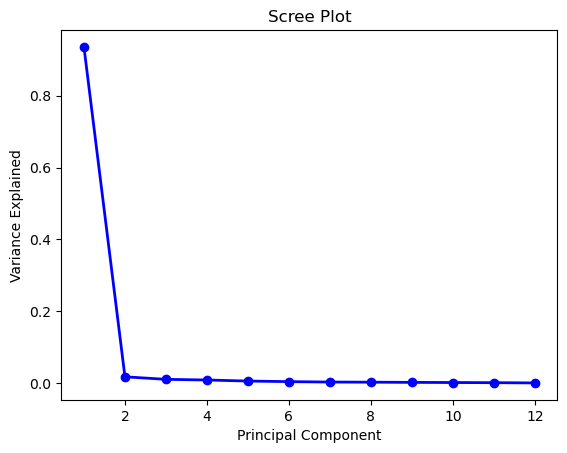

In [164]:
PC_indices = np.arange(K) + 1
plt.plot(PC_indices, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [154]:
alt.Chart(df).mark_point().encode(
    x = alt.X('PC 1', title = 'PC1 score'),
    y = alt.Y('PC 2', title = 'PC2 score'),
    color = alt.Color('Topic:N', title = 'Term',scale=alt.Scale(scheme='dark2'))
)

ValueError: PC 1 encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.Chart(...)

In [155]:
## END OF CHOSEN TSNE###########################################################################
# one more combo - first by period

all_price_rise = pd.concat((increase_of_prices,rising_prices), axis = 0).reset_index()
all_price_rise['topic'] = 'rise_prices'

all_price_rice_housing = pd.concat((increase_price_homef,rising_price_homef), axis = 0).reset_index()
all_price_rice_housing['topic'] = 'rise_prices_housing'

In [156]:
all_price_rise_sent = all_price_rise[['compound_score','topic', 'period']]

all_price_rice_housing_sent = all_price_rice_housing[['compound_score','topic', 'period']]

In [157]:
all_price_rise_sent_g = all_price_rise_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

all_price_rice_housing_sent_g = all_price_rice_housing_sent.groupby('period').agg({'compound_score': 'mean', 'topic': 'first'}).reset_index()

In [158]:
all_scores = pd.concat([affordable_housing_sent_g, cost_of_living_sent_g, foreign_buyer_ban_sent_g, foreign_buyer_sent_g, foreign_home_buyer_sent_g, foreign_investors_sent_g, freedom_convoy_sent_g, generational_wealth_sent_g, home_owner_sent_g, housing_crisis_sent_g, housing_market_sent_g, interest_rate_homef_sent_g, low_income_housing_sent_g, minimum_wage_sent_g, property_tax_canada_sent_g, rental_market_sent_g, social_assistance_sent_g, standard_of_living_sent_g, all_price_rise_sent_g, all_price_rice_housing_sent_g],ignore_index = False).reset_index()
all_scores

,index,period,compound_score,topic,year
0,0,2016-11,0.122211,affordable_housing,2016
1,1,2016-12,0.082457,affordable_housing,2016
2,2,2017-01,0.096740,affordable_housing,2017
3,3,2017-02,0.103582,affordable_housing,2017
4,4,2017-03,0.099770,affordable_housing,2017
...,...,...,...,...,...
1451,68,2022-06,0.170856,rise_prices_housing,NaN
1452,69,2022-07,0.202450,rise_prices_housing,NaN
1453,70,2022-08,0.128755,rise_prices_housing,NaN
1454,71,2022-09,0.281027,rise_prices_housing,NaN


In [159]:
for i in range(0,len(all_scores)):
    if all_scores.loc[i]['period'] == '2016-10':
        all_scores = all_scores.drop([i])
    elif all_scores.loc[i]['period'] == '2016-11':
        all_scores = all_scores.drop([i])
        
all_scores = all_scores.drop(columns = [ 'index'])
all_scores = all_scores.reset_index()

In [160]:
mean_c_score = all_scores['compound_score'].mean()
mean_c_score

0.10045430723373547

In [161]:
X = all_scores['compound_score'] - mean_c_score
#X = all_scores['compound_score']
X = np.array(X.values.tolist())
X = X.reshape(-1, 1)
X

array([[-0.01799711],
       [-0.0037148 ],
       [ 0.00312788],
       ...,
       [ 0.02830073],
       [ 0.18057258],
       [ 0.12358822]])

In [162]:
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [163]:
df = pd.DataFrame(X_tsne, columns=['z1','z2'])

df['Topic'] = all_scores['topic']

In [232]:
#df.to_csv('model3a_row_per_tweet.csv')

In [165]:
df

,z1,z2,Topic
0,-2.758054,-7.563672,affordable_housing
1,2.366346,-17.265888,affordable_housing
2,6.698433,-19.099997,affordable_housing
3,4.206972,-18.076870,affordable_housing
4,3.248176,0.597324,affordable_housing
...,...,...,...
1415,3.592638,-49.748161,rise_prices_housing
1416,-17.349108,-41.538586,rise_prices_housing
1417,25.008709,-27.119362,rise_prices_housing
1418,-29.107370,-28.578234,rise_prices_housing


In [164]:
selection = alt.selection_multi(fields=['Topic'], bind='legend')

alt.Chart(df).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term', scale=alt.Scale(scheme='category10')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
)

alt.Chart(...)

In [166]:
# NOW tSNE by year
#making list for easy traversal

np_arrays = [0]*21

#np_arrays[0] = None #put inflation in here eventually
np_arrays[0] = inflation_sent_g
np_arrays[1] = affordable_housing_sent_g
np_arrays[2] = cost_of_living_sent_g
np_arrays[3] = foreign_buyer_ban_sent_g
np_arrays[4] = foreign_buyer_sent_g
np_arrays[5] = foreign_home_buyer_sent_g
np_arrays[6] = foreign_investors_sent_g
np_arrays[7] = freedom_convoy_sent_g
np_arrays[8] = generational_wealth_sent_g
np_arrays[9] = home_owner_sent_g
np_arrays[10] = housing_crisis_sent_g
np_arrays[11] = housing_market_sent_g

np_arrays[12] = all_price_rise_sent_g
np_arrays[13] = interest_rate_homef_sent_g
np_arrays[14] = low_income_housing_sent_g
np_arrays[15] = minimum_wage_sent_g
np_arrays[16] = property_tax_canada_sent_g
np_arrays[17] = rental_market_sent_g

np_arrays[18] = all_price_rice_housing_sent_g
np_arrays[19] = social_assistance_sent_g
np_arrays[20] = standard_of_living_sent_g

In [168]:
for i in range(0,len(np_arrays)):#1 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    (np_arrays[i])['year'] = (np_arrays[i])['period'].str[:4]

np_arrays[0]

,period,compound_score,topic,year
0,2016-10,-0.014264,inflation,2016
1,2016-11,0.018277,inflation,2016
2,2016-12,0.006713,inflation,2016
3,2017-01,0.010989,inflation,2017
4,2017-02,0.010885,inflation,2017
...,...,...,...,...
68,2022-06,-0.067924,inflation,2022
69,2022-07,-0.051699,inflation,2022
70,2022-08,-0.023711,inflation,2022
71,2022-09,-0.052461,inflation,2022


In [169]:
#group by year

year_grouped = [0]*len(np_arrays)

for i in range(0,len(year_grouped)):#1 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    year_grouped[i] = (np_arrays[i]).groupby('year')

#function below is to retrieve each group, change 1 to whatever index wanted (indexed by term)
[year_grouped[10//6].get_group(x) for x in year_grouped[i].groups]

[    period  compound_score               topic  year
 0  2016-11        0.122211  affordable_housing  2016
 1  2016-12        0.082457  affordable_housing  2016,
      period  compound_score               topic  year
 2   2017-01        0.096740  affordable_housing  2017
 3   2017-02        0.103582  affordable_housing  2017
 4   2017-03        0.099770  affordable_housing  2017
 5   2017-04        0.073049  affordable_housing  2017
 6   2017-05        0.073436  affordable_housing  2017
 7   2017-06        0.093569  affordable_housing  2017
 8   2017-07        0.084820  affordable_housing  2017
 9   2017-08        0.080836  affordable_housing  2017
 10  2017-09        0.098144  affordable_housing  2017
 11  2017-10        0.102746  affordable_housing  2017
 12  2017-11        0.106507  affordable_housing  2017
 13  2017-12        0.101854  affordable_housing  2017,
      period  compound_score               topic  year
 14  2018-01        0.132641  affordable_housing  2018
 15  2018-0

In [227]:
#All length 7 so no need to clean more
compound_scores = [0]*len(year_grouped)*6
topics = [0]*len(year_grouped)*6

for i in range(0,len(compound_scores)):  #6 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
    curr_group = [year_grouped[i//6].get_group(x) for x in year_grouped[i//6].groups]
    curr_df = curr_group[i%6]
    compound_scores[i] = curr_df['compound_score']
    topics[i] = curr_df['topic']
    
#compound_scores[len(year_grouped)*6 - 1]
#topics

In [172]:
all_np = [0]*len(compound_scores)
all_topics = [0]*len(compound_scores)

for i in range(0,len(all_np)):#6 bc no inflation yet -- CHANGE TO 0 ONCE INFLATION ADDED
    all_np[i] = [(np.array((compound_scores[i]).values.tolist()))]
    all_topics[i] = [topics[i].tolist()]
    
len(all_np)
len(all_topics)

126

In [175]:
# to easily write into concat function
concat_names = "all_np[1], "#1 bc no inflation yet -- CHANGE ONCE INFLATION ADDED
concat_topics = "all_topics[1], "

for i in range(2,len(all_np)-1): #7 bc no inflation yet -- CHANGE TO 1 ONCE INFLATION ADDED
    if i%6 == 0:
        continue
    elif i%6 == 5:
        continue
    concat_names = concat_names + "all_np[" + str(i) + "],"
    concat_topics = concat_topics + "all_topics[" + str(i) + "],"

concat_names = concat_names + "all_np[" + str(i+1) + "]"
concat_topics = concat_topics + "all_topics[" + str(i+1) + "]"

concat_names
#concat_topics

'all_np[1], all_np[2],all_np[3],all_np[4],all_np[7],all_np[8],all_np[9],all_np[10],all_np[13],all_np[14],all_np[15],all_np[16],all_np[19],all_np[20],all_np[21],all_np[22],all_np[25],all_np[26],all_np[27],all_np[28],all_np[31],all_np[32],all_np[33],all_np[34],all_np[37],all_np[38],all_np[39],all_np[40],all_np[43],all_np[44],all_np[45],all_np[46],all_np[49],all_np[50],all_np[51],all_np[52],all_np[55],all_np[56],all_np[57],all_np[58],all_np[61],all_np[62],all_np[63],all_np[64],all_np[67],all_np[68],all_np[69],all_np[70],all_np[73],all_np[74],all_np[75],all_np[76],all_np[79],all_np[80],all_np[81],all_np[82],all_np[85],all_np[86],all_np[87],all_np[88],all_np[91],all_np[92],all_np[93],all_np[94],all_np[97],all_np[98],all_np[99],all_np[100],all_np[103],all_np[104],all_np[105],all_np[106],all_np[109],all_np[110],all_np[111],all_np[112],all_np[115],all_np[116],all_np[117],all_np[118],all_np[121],all_np[122],all_np[123],all_np[124],all_np[125]'

In [178]:
X = np.concatenate((all_np[1], all_np[2],all_np[3],all_np[4],all_np[7], all_np[8],all_np[9],all_np[10],all_np[13],all_np[14],all_np[15],all_np[16],all_np[19],all_np[20],all_np[21],all_np[22],all_np[25],all_np[26],all_np[27],all_np[28],all_np[31],all_np[32],all_np[33],all_np[34],all_np[37],all_np[38],all_np[39],all_np[40],all_np[43],all_np[44],all_np[45],all_np[46],all_np[49],all_np[50],all_np[51],all_np[52],all_np[55],all_np[56],all_np[57],all_np[58],all_np[61],all_np[62],all_np[63],all_np[64],all_np[67],all_np[68],all_np[69],all_np[70],all_np[73],all_np[74],all_np[75],all_np[76],all_np[79],all_np[80],all_np[81],all_np[82],all_np[85],all_np[86],all_np[87],all_np[88],all_np[91],all_np[92],all_np[93],all_np[94],all_np[97],all_np[98],all_np[99],all_np[100],all_np[103],all_np[104],all_np[105],all_np[106],all_np[109],all_np[110],all_np[111],all_np[112],all_np[115],all_np[116],all_np[117],all_np[118],all_np[121],all_np[122],all_np[123],all_np[124],all_np[125]), axis = 0)
X

topics = np.concatenate((all_topics[1], all_topics[2],all_topics[3],all_topics[4],all_topics[7], all_topics[8],all_topics[9],all_topics[10],all_topics[13],all_topics[14],all_topics[15],all_topics[16],all_topics[19],all_topics[20],all_topics[21],all_topics[22],all_topics[25],all_topics[26],all_topics[27],all_topics[28],all_topics[31],all_topics[32],all_topics[33],all_topics[34],all_topics[37],all_topics[38],all_topics[39],all_topics[40],all_topics[43],all_topics[44],all_topics[45],all_topics[46],all_topics[49],all_topics[50],all_topics[51],all_topics[52],all_topics[55],all_topics[56],all_topics[57],all_topics[58],all_topics[61],all_topics[62],all_topics[63],all_topics[64],all_topics[67],all_topics[68],all_topics[69],all_topics[70],all_topics[73],all_topics[74],all_topics[75],all_topics[76],all_topics[79],all_topics[80],all_topics[81],all_topics[82],all_topics[85],all_topics[86],all_topics[87],all_topics[88],all_topics[91],all_topics[92],all_topics[93],all_topics[94],all_topics[97],all_topics[98],all_topics[99],all_topics[100],all_topics[103],all_topics[104],all_topics[105],all_topics[106],all_topics[109],all_topics[110],all_topics[111],all_topics[112],all_topics[115],all_topics[116],all_topics[117],all_topics[118],all_topics[121],all_topics[122],all_topics[123],all_topics[124],all_topics[125]), axis = 0)
topics
(X)

array([[0.0109888 , 0.01088453, 0.01262592, ..., 0.01517936, 0.01008331,
        0.03139493],
       [0.02913237, 0.01583002, 0.03081674, ..., 0.01904418, 0.03210442,
        0.02627623],
       [0.02870963, 0.04133081, 0.03613703, ..., 0.02661619, 0.03508722,
        0.02420614],
       ...,
       [0.21874108, 0.19704752, 0.20178307, ..., 0.18829871, 0.19701444,
        0.18095424],
       [0.18592302, 0.19290706, 0.17122475, ..., 0.14302916, 0.19835946,
        0.17447383],
       [0.15005328, 0.16180763, 0.15375796, ..., 0.15391046, 0.16226335,
        0.1574404 ]])

In [179]:
fintops = [0]*len(topics)

for i in range(0,len(fintops)):
    fintops[i] = topics[i][0]

fintops

['inflation',
 'inflation',
 'inflation',
 'inflation',
 'affordable_housing',
 'affordable_housing',
 'affordable_housing',
 'affordable_housing',
 'cost_of_living',
 'cost_of_living',
 'cost_of_living',
 'cost_of_living',
 'foreign_buyer_ban',
 'foreign_buyer_ban',
 'foreign_buyer_ban',
 'foreign_buyer_ban',
 'Foreign_Buyer',
 'Foreign_Buyer',
 'Foreign_Buyer',
 'Foreign_Buyer',
 'foreign_home_buyer',
 'foreign_home_buyer',
 'foreign_home_buyer',
 'foreign_home_buyer',
 'foreign_investors',
 'foreign_investors',
 'foreign_investors',
 'foreign_investors',
 'Freedom_Convoy',
 'Freedom_Convoy',
 'Freedom_Convoy',
 'Freedom_Convoy',
 'Generational_Wealth',
 'Generational_Wealth',
 'Generational_Wealth',
 'Generational_Wealth',
 'home_owner',
 'home_owner',
 'home_owner',
 'home_owner',
 'housing_crisis',
 'housing_crisis',
 'housing_crisis',
 'housing_crisis',
 'housing_market',
 'housing_market',
 'housing_market',
 'housing_market',
 'rise_prices',
 'rise_prices',
 'rise_prices',
 'ri

In [180]:
mean_c_score = X.mean(axis=0)
X = X - mean_c_score
mean_c_score

array([0.11077062, 0.09397376, 0.11220023, 0.09329632, 0.08966261,
       0.09964946, 0.08461862, 0.09421677, 0.10166293, 0.09192566,
       0.10696169, 0.10208544])

In [228]:
tsne = TSNE(n_components = 2, perplexity = 14)
X_tsne = tsne.fit_transform(X)

C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\awyat049\.conda\envs\SDS3386\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [229]:
df = pd.DataFrame(X_tsne, columns=['z1','z2'])

df['Topic'] = fintops

In [231]:
df.to_csv('model3b_row_per_year.csv')

In [230]:
selection = alt.selection_multi(fields=['Topic'], bind='legend')

alt.Chart(df).mark_point().encode(
    x = 'z1',
    y = 'z2',
    color = alt.Color('Topic:N', title = 'Term', scale=alt.Scale(scheme='tableau20')),# the person in the photo
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2) )
).add_selection(
    selection
)

alt.Chart(...)

In [ ]:
# lose some explanability here so DO NOT USE, use the ones ABOVE THIS

# MAKING COMPOSITE VARIABLES

## Variable list to use

- affordable_housing_sent_g, 
- cost_of_living_sent_g, 
- foreign_buyer_ban_sent_g, 
- foreign_buyer_sent_g, 
- foreign_home_buyer_sent_g, 
- foreign_investors_sent_g, 
- freedom_convoy_sent_g, 
- generational_wealth_sent_g, 
- home_owner_sent_g, 
- housing_crisis_sent_g, 
- housing_market_sent_g, 
- increase_of_prices_sent_g, 
- increase_price_homef_sent_g, 
- interest_rate_homef_sent_g, 
- low_income_housing_sent_g, 
- minimum_wage_sent_g, 
- property_tax_canada_sent_g, 
- rental_market_sent_g, 
- rising_price_homef_sent_g, 
- rising_prices_sent_g, 
- social_assistance_sent_g, 
- standard_of_living_sent_g
